In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.units as munits
import numpy as np

# Forecasting Lapa station temperature

In [2]:
cge = pd.read_csv("../data/processed/lapa_temp.csv")
cge = cge.dropna(axis=1, how="all")
cge = cge.dropna()
cge

timestamp  station  precipitation  temperature  \
23     2016-01-22 13:00:00  1000848            0.0    22.507833   
24     2016-01-22 14:00:00  1000848            0.0    22.818000   
25     2016-01-22 15:00:00  1000848            0.0    23.602000   
26     2016-01-22 16:00:00  1000848            0.0    23.912667   
27     2016-01-22 17:00:00  1000848            0.0    23.583667   
...                    ...      ...            ...          ...   
26980  2019-02-18 18:00:00  1000848            0.0    27.068333   
26981  2019-02-18 19:00:00  1000848            0.0    26.657000   
26982  2019-02-18 20:00:00  1000848            0.0    26.392000   
26983  2019-02-18 21:00:00  1000848            0.0    25.975667   
26984  2019-02-18 22:00:00  1000848            0.0    24.278667   

       relative_humidity    pressure  wind_velocity_x  wind_velocity_y  \
23             70.349833  935.693333        -2.123048         1.231284   
24             70.023333  935.545000        -2.322541         1.360354   
25             68.897167  935.361667        -1.924085         1.737422   
26             67.558333  934.646667        -1.551347         1.542513   
27             69.319333  934.471667        -2.510662         1.490405   
...                  ...         ...              ...              ...   
26980          67.378167  930.448333         0.987694        -1.814244   
26981          69.979500  930.051667         0.917986        -0.961140   
26982          71.525833  930.355000         0.097844        -0.196218   
26983          72.498333  930.805000         0.079571        -0.134955   
26984          83.885167  931.520000         0.000000         0.000000   

       wind_blow_x  wind_blow_y  ... wind_velocity_y_window_23H_min  \
23       -3.091948     2.293418  ...                       0.353227   
24       -4.462781     3.071566  ...                       0.353227   
25       -4.132827     4.013695  ...                       0.353227   
26       -3.521743     4.815891  ...                       0.353227   
27       -5.402128     3.085149  ...                       0.353227   
...            ...          ...  ...                            ...   
26980     3.193784    -4.762114  ...                      -2.780419   
26981     2.594402    -4.523592  ...                      -2.780419   
26982     1.376222    -3.055869  ...                      -2.780419   
26983    -0.145668    -0.977395  ...                      -2.780419   
26984    -1.222904     0.427156  ...                      -2.780419   

       wind_velocity_y_window_23H_max  wind_blow_x_window_23H_mean  \
23                           1.975442                    -3.222317   
24                           1.975442                    -3.132557   
25                           1.975442                    -3.155863   
26                           1.975442                    -3.077330   
27                           1.975442                    -3.066816   
...                               ...                          ...   
26980                        0.000000                     1.378546   
26981                        0.000000                     1.403308   
26982                        0.000000                     1.432732   
26983                        0.000000                     1.463033   
26984                        0.000000                     1.456700   

       wind_blow_x_window_23H_std  wind_blow_x_window_23H_min  \
23                       1.874855                   -6.408644   
24                       1.826854                   -6.408644   
25                       1.840812                   -6.408644   
26                       1.753118                   -6.408644   
27                       1.749537                   -6.408644   
...                           ...                         ...   
26980                    2.014805                   -0.995222   
26981                    2.034217                   -0.995222   
26982                    2.046850           

In [3]:
ts = cge[["timestamp"]]
ts.head()

timestamp
23  2016-01-22 13:00:00
24  2016-01-22 14:00:00
25  2016-01-22 15:00:00
26  2016-01-22 16:00:00
27  2016-01-22 17:00:00

In [4]:
def make_steps(df, y):
    for i in range(6):
        df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
    return df

y = make_steps(df=cge[["temperature"]], y="temperature").drop("temperature", axis=1)
y = y.dropna()

y

/tmp/ipykernel_1548/1100420432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
/tmp/ipykernel_1548/1100420432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{y}_step_{i+1}"] = df[y].shift(-i+1)
/tmp/ipykernel_1548/1100420432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

temperature_step_1  temperature_step_2  temperature_step_3  \
24              22.507833           22.818000           23.602000   
25              22.818000           23.602000           23.912667   
26              23.602000           23.912667           23.583667   
27              23.912667           23.583667           22.805000   
28              23.583667           22.805000           21.860000   
...                   ...                 ...                 ...   
26976           25.134833           26.064667           26.781500   
26977           26.064667           26.781500           26.897333   
26978           26.781500           26.897333           27.301667   
26979           26.897333           27.301667           27.068333   
26980           27.301667           27.068333           26.657000   

       temperature_step_4  temperature_step_5  temperature_step_6  
24              23.912667           23.583667           22.805000  
25              23.583667           22.805000           21.860000  
26              22.805000           21.860000           21.005333  
27              21.860000           21.005333           20.241500  
28              21.005333           20.241500           19.929667  
...                   ...                 ...                 ...  
26976           26.897333           27.301667           27.068333  
26977           27.301667           27.068333           26.657000  
26978           27.068333           26.657000           26.392000  
26979           26.657000           26.392000           25.975667  
26980           26.392000           25.975667           24.278667  

[25815 rows x 6 columns]

In [5]:
X = cge.drop(["timestamp", "station", "station_name", "precipitation", "temperature", "relative_humidity", "pressure", "wind_velocity_x", "wind_velocity_y", "wind_blow_x", "wind_blow_y"], axis=1)
X = X.loc[y.index.min():y.index.max()]
X

month_sin  month_cos  hour_sin  hour_cos  precipitation_lag_1H  \
24      0.500000   0.866025 -0.631088 -0.775711                   0.0   
25      0.500000   0.866025 -0.816970 -0.576680                   0.0   
26      0.500000   0.866025 -0.942261 -0.334880                   0.0   
27      0.500000   0.866025 -0.997669 -0.068242                   0.0   
28      0.500000   0.866025 -0.979084  0.203456                   0.0   
...          ...        ...       ...       ...                   ...   
26976   0.866025   0.500000 -0.631088 -0.775711                   0.0   
26977   0.866025   0.500000 -0.816970 -0.576680                   0.0   
26978   0.866025   0.500000 -0.942261 -0.334880                   0.0   
26979   0.866025   0.500000 -0.997669 -0.068242                   0.0   
26980   0.866025   0.500000 -0.979084  0.203456                   0.0   

       temperature_lag_1H  relative_humidity_lag_1H  pressure_lag_1H  \
24              22.507833                 70.349833       935.693333   
25              22.818000                 70.023333       935.545000   
26              23.602000                 68.897167       935.361667   
27              23.912667                 67.558333       934.646667   
28              23.583667                 69.319333       934.471667   
...                   ...                       ...              ...   
26976           25.134833                 77.702833       933.453333   
26977           26.064667                 72.474167       933.323333   
26978           26.781500                 69.313167       933.056667   
26979           26.897333                 67.159667       931.961667   
26980           27.301667                 66.227500       931.155000   

       wind_velocity_x_lag_1H  wind_velocity_y_lag_1H  ...  \
24                  -2.123048                1.231284  ...   
25                  -2.322541                1.360354  ...   
26                  -1.924085                1.737422  ...   
27                  -1.551347                1.542513  ...   
28                  -2.510662                1.490405  ...   
...                       ...                     ...  ...   
26976                2.035907               -2.098046  ...   
26977                1.357837               -0.859687  ...   
26978                1.985046               -1.482932  ...   
26979                2.405335               -2.465837  ...   
26980                1.793755               -2.780419  ...   

       wind_velocity_y_window_23H_min  wind_velocity_y_window_23H_max  \
24                           0.353227                        1.975442   
25                           0.353227                        1.975442   
26                           0.353227                        1.975442   
27                           0.353227                        1.975442   
28                           0.353227                        1.975442   
...                               ...                             ...   
26976                       -4.470837                        0.000000   
26977                       -4.470837                        0.000000   
26978                       -4.470837                        0.000000   
26979                       -3.554041                        0.000000   
26980                       -2.780419                        0.000000   

       wind_blow_x_window_23H_mean  wind_blow_x_window_23H_std  \
24                       -3.132557                    1.826854   
25                       -3.155863                    1.840812   
26                       -3.077330                    1.753118   
27                       -3.066816                    1.749537   
28                       -3.050447                    1.724594   
...                            ...                         ...   
26976                     1.196976                    1.716638   
26977                     1.268685                    1.863804   
26978                     1.340824               

In [6]:
ts = ts.loc[y.index.min():y.index.max()]
ts

timestamp
24     2016-01-22 14:00:00
25     2016-01-22 15:00:00
26     2016-01-22 16:00:00
27     2016-01-22 17:00:00
28     2016-01-22 18:00:00
...                    ...
26976  2019-02-18 14:00:00
26977  2019-02-18 15:00:00
26978  2019-02-18 16:00:00
26979  2019-02-18 17:00:00
26980  2019-02-18 18:00:00

[25815 rows x 1 columns]

In [7]:
# the following code lines are necessary to import custom module
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

from sklearn.linear_model import (LassoCV, RidgeCV, TweedieRegressor, RANSACRegressor, 
                                  TheilSenRegressor, HuberRegressor, PassiveAggressiveRegressor,
                                  ElasticNetCV, BayesianRidge, QuantileRegressor)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV

scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

test_size = 0.30
X_train_ref, X_test_ref, _, _ = train_test_split(X, y, test_size=0.30, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=test_size, shuffle=False)

In [8]:
gb = RegressorChain(
    base_estimator=HalvingGridSearchCV(
        estimator=HistGradientBoostingRegressor(random_state=123),
        param_grid = {
            "max_depth": np.arange(10, 40, 10, dtype=int),
            "learning_rate": np.logspace(-3, -1, 3)
        },
        cv=TimeSeriesSplit(n_splits=3, test_size=2000),
        aggressive_elimination=True,
        scoring="neg_mean_squared_error",
        random_state=123,
        n_jobs=-1
    ),
    random_state=123
)

mlp = RegressorChain(
    base_estimator=HalvingGridSearchCV(
        estimator=MLPRegressor(max_iter=1000, random_state=123),
        param_grid = {
            "hidden_layer_sizes": [(100,), (100, 75, 25)],
            "activation": ["identity", "logistic", "tanh", "relu"]
        },
        cv=TimeSeriesSplit(n_splits=3, test_size=2000),
        aggressive_elimination=True,
        scoring="neg_mean_squared_error",
        random_state=123,
        n_jobs=-1
    ),
    random_state=123
)

rid = RegressorChain(
    base_estimator=RidgeCV(
        alphas=[1e-3, 1e-2, 1e-1, 1],
        cv=TimeSeriesSplit(n_splits=3, test_size=2000),
    ),
    random_state=123
)

models = {
    "mlp": mlp,
    "gb": gb,
    "rid": rid
}

models["rid"].fit(X_train, y_train)

RegressorChain(base_estimator=RidgeCV(alphas=[0.001, 0.01, 0.1, 1],
                                      cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=2000)),
               random_state=123)

In [9]:
y_pred = pd.DataFrame(models["rid"].predict(X_test), index=X_test_ref.index, columns=y.columns)

<AxesSubplot:xlabel='timestamp'>

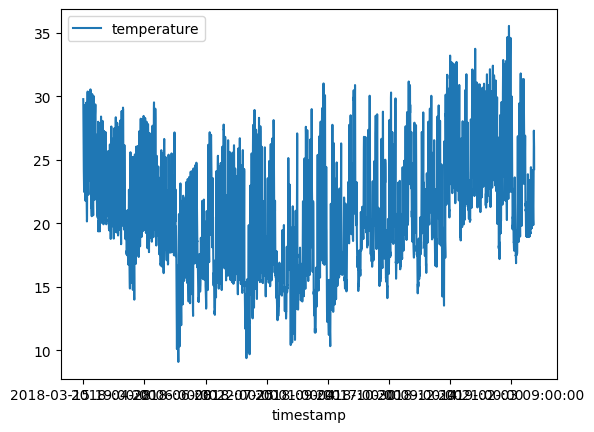

In [10]:
test = cge[X_test_ref.index[0]:X_test_ref.index[-1]][["timestamp", "temperature"]].set_index("timestamp")
test.plot()

In [11]:
test.index = pd.to_datetime(test.index)
test

temperature
timestamp                       
2018-03-15 19:00:00    29.782500
2018-03-15 20:00:00    29.586167
2018-03-15 21:00:00    28.779000
2018-03-15 22:00:00    28.037000
2018-03-15 23:00:00    26.811667
...                          ...
2019-02-18 18:00:00    27.068333
2019-02-18 19:00:00    26.657000
2019-02-18 20:00:00    26.392000
2019-02-18 21:00:00    25.975667
2019-02-18 22:00:00    24.278667

[7374 rows x 1 columns]

In [12]:
ts.timestamp = pd.to_datetime(ts.timestamp)
y_pred["timestamp"] = ts[y_pred.index[0]:y_pred.index[-1]]["timestamp"]
y_pred = y_pred.dropna()
y_pred

temperature_step_1  temperature_step_2  temperature_step_3  \
18822           29.770700           28.360776           26.732035   
18823           29.565480           28.469748           26.603999   
18824           28.710093           27.283069           26.388110   
18825           28.015172           27.456308           26.921607   
18826           26.806536           26.143802           25.502576   
...                   ...                 ...                 ...   
26976           25.126981           25.927591           26.690025   
26977           26.075491           26.894218           27.368237   
26978           26.797964           27.259312           27.230600   
26979           26.901022           26.987109           26.511235   
26980           27.312661           27.203548           26.758150   

       temperature_step_4  temperature_step_5  temperature_step_6  \
18822           25.124306           23.963533           23.977936   
18823           25.344041           25.208183           24.706556   
18824           26.442042           26.006252           25.055729   
18825           26.268499           25.527701           24.898542   
18826           24.853409           24.440884           24.229151   
...                   ...                 ...                 ...   
26976           27.182020           27.213526           26.793362   
26977           27.386044           27.006295           26.454840   
26978           26.800037           26.141970           25.087519   
26979           25.862086           24.847529           23.644324   
26980           25.717652           24.355452           23.318732   

                timestamp  
18822 2018-03-15 20:00:00  
18823 2018-03-15 21:00:00  
18824 2018-03-15 22:00:00  
18825 2018-03-15 23:00:00  
18826 2018-03-16 00:00:00  
...                   ...  
26976 2019-02-18 14:00:00  
26977 2019-02-18 15:00:00  
26978 2019-02-18 16:00:00  
26979 2019-02-18 17:00:00  
26980 2019-02-18 18:00:00  

[7369 rows x 7 columns]

/tmp/ipykernel_1548/3499251528.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(9,3))


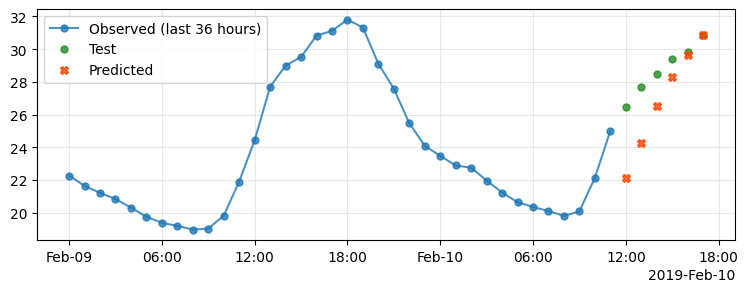

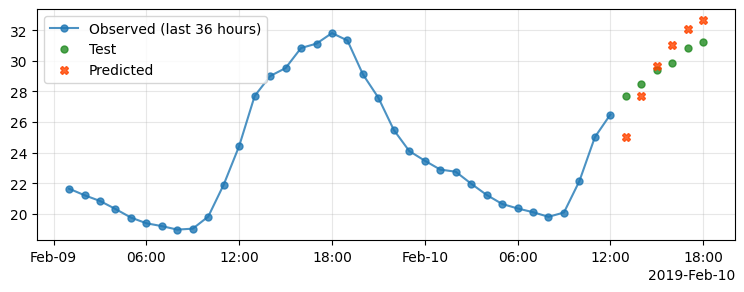

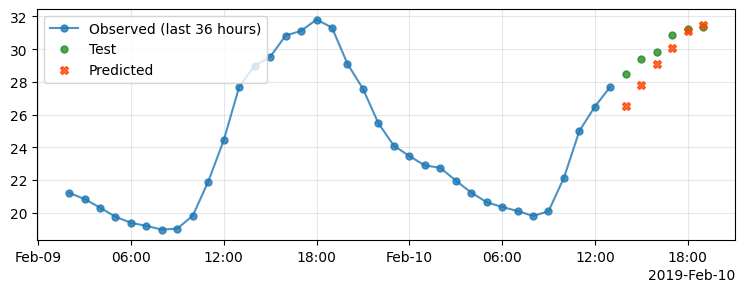

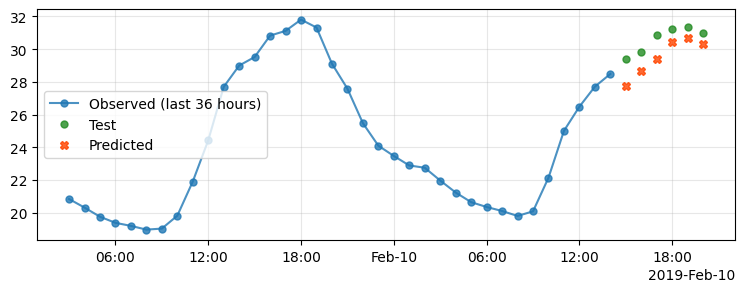

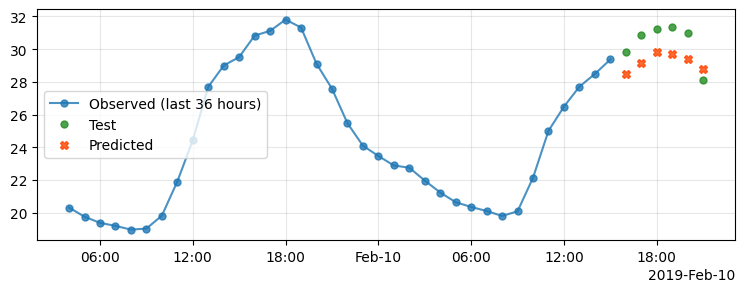

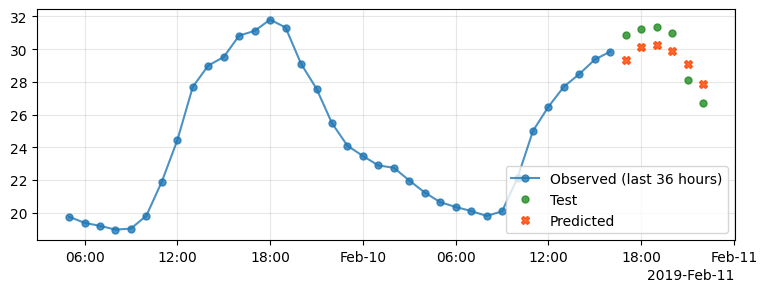

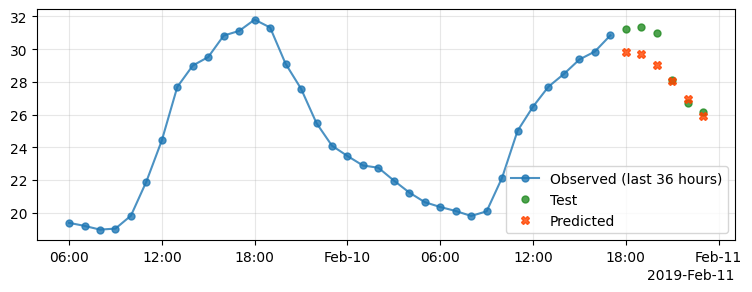

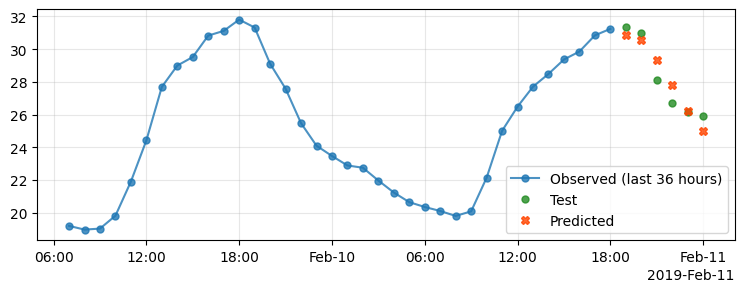

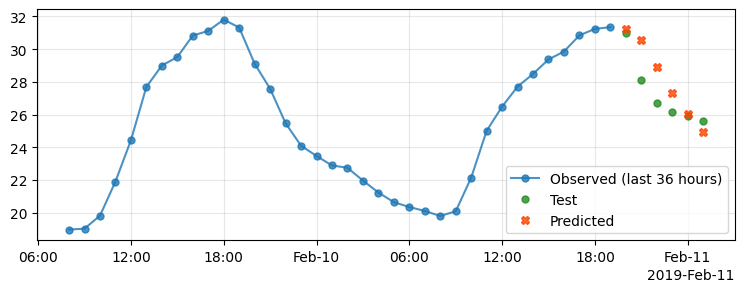

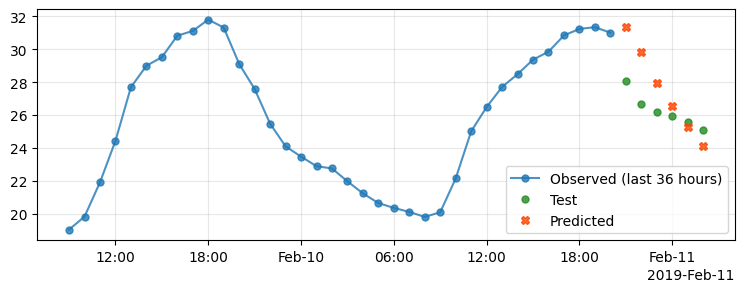

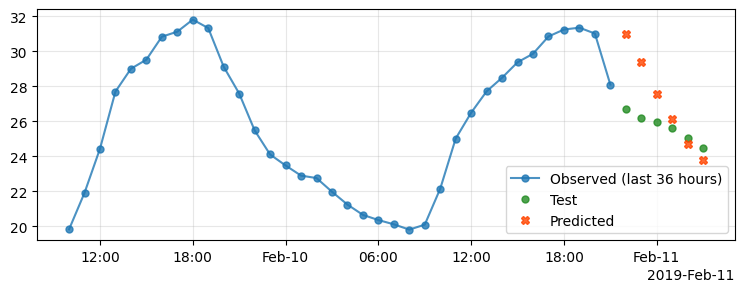

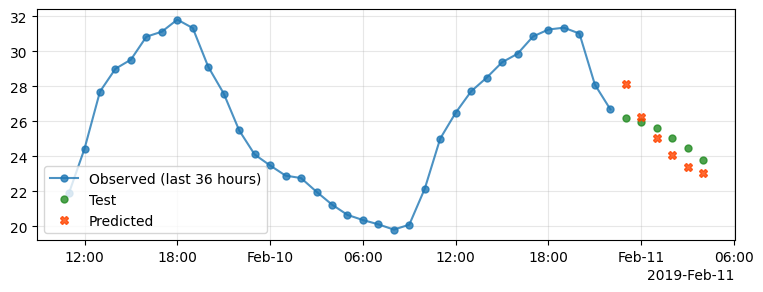

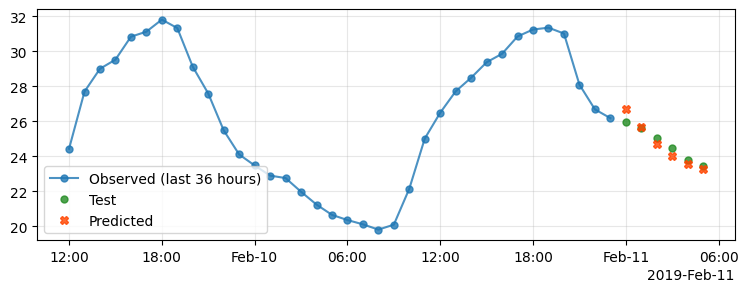

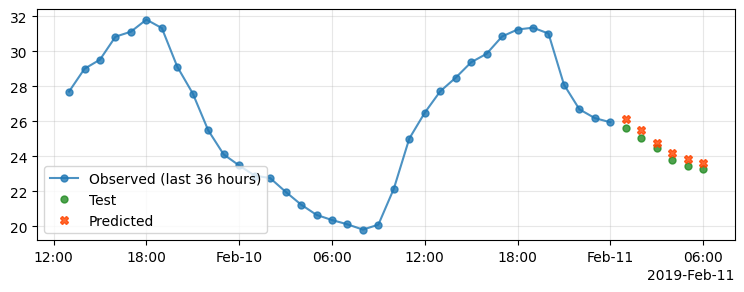

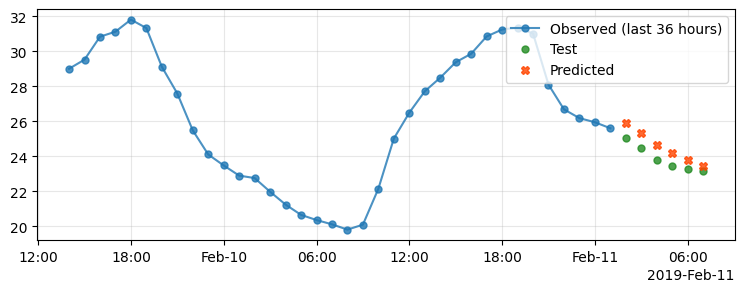

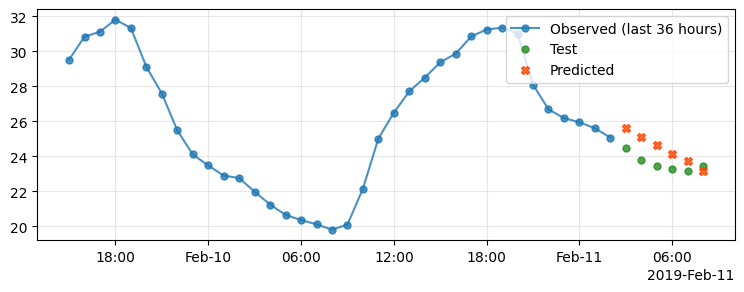

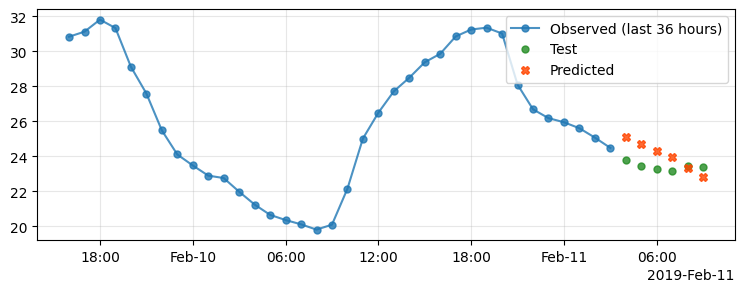

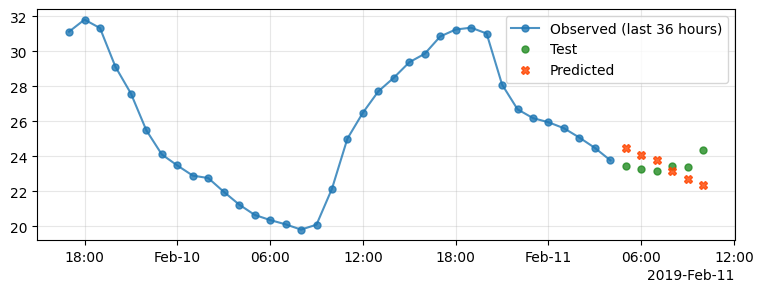

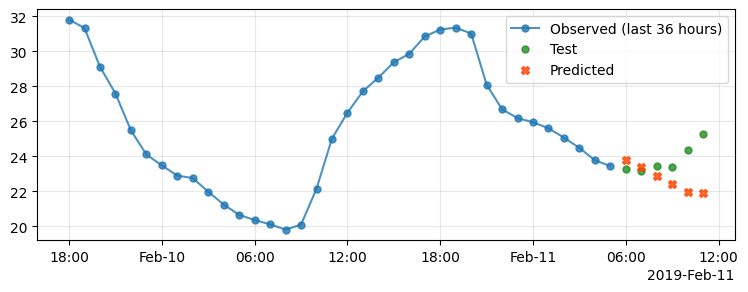

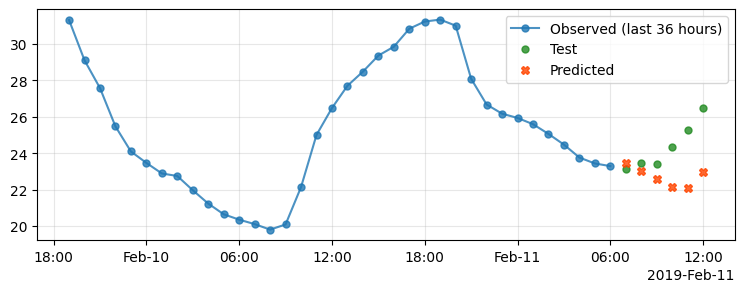

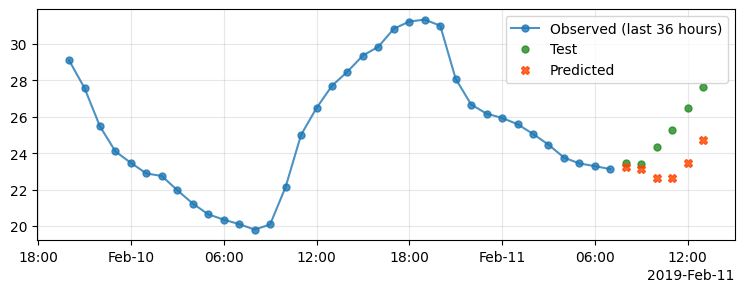

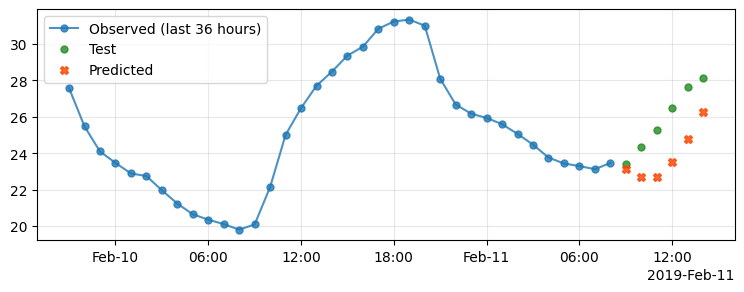

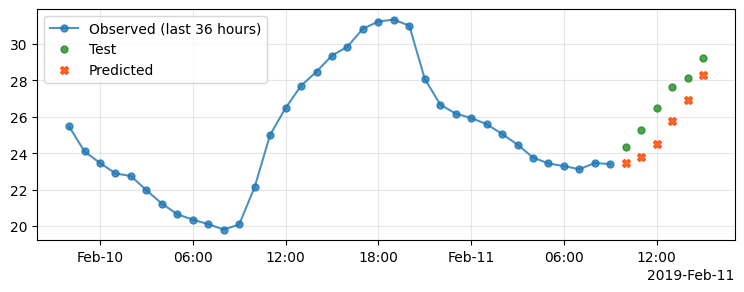

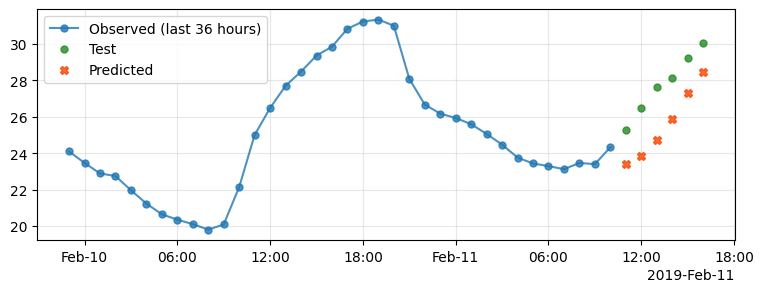

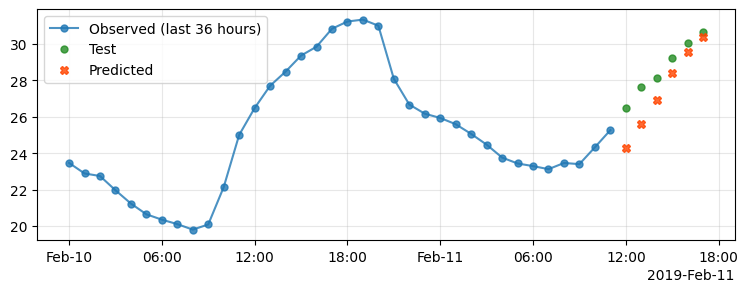

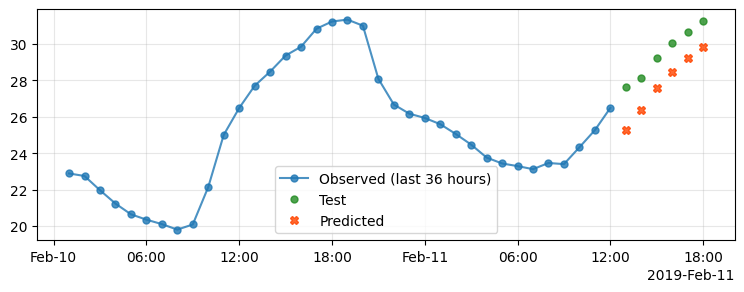

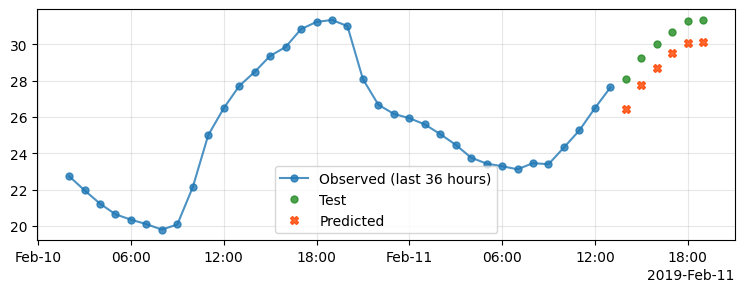

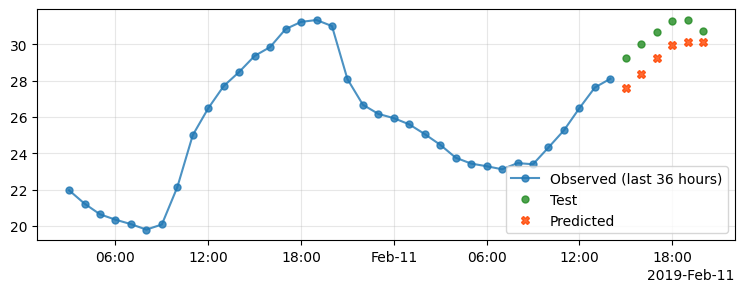

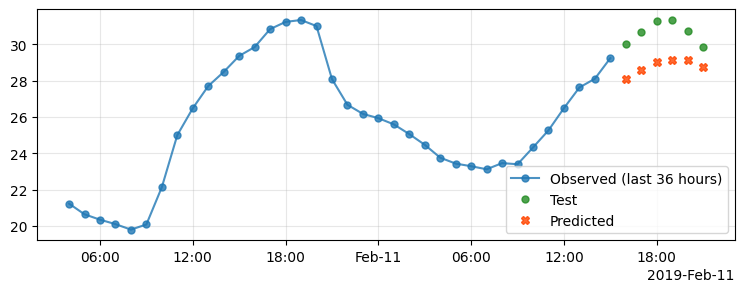

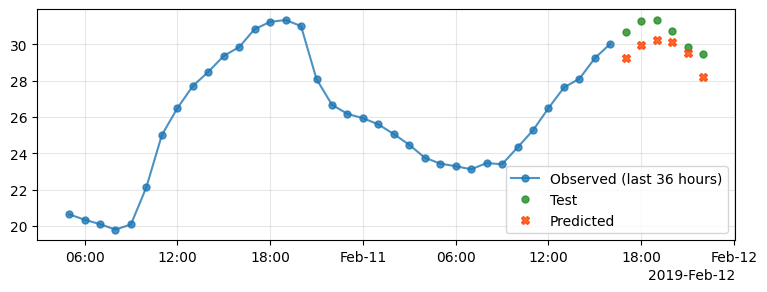

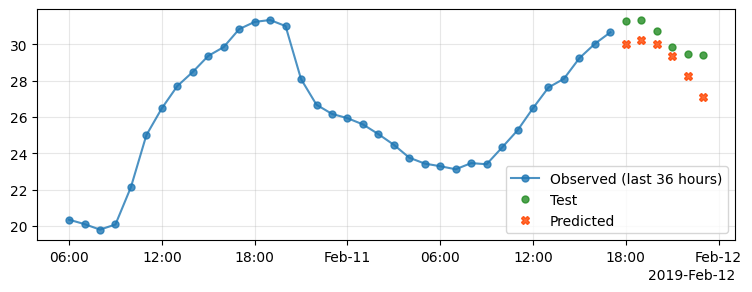

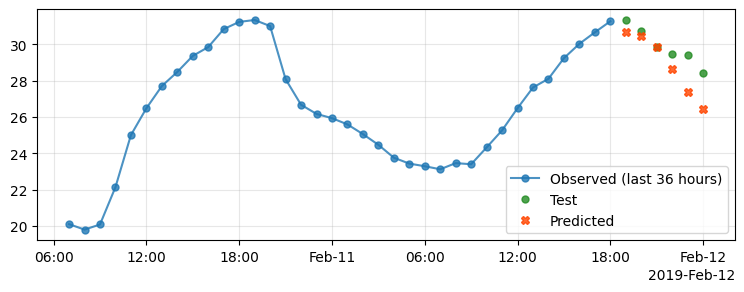

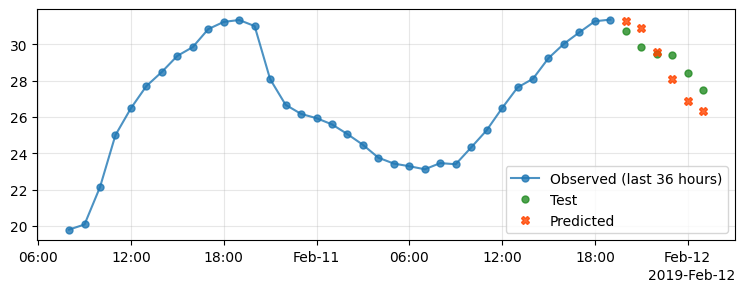

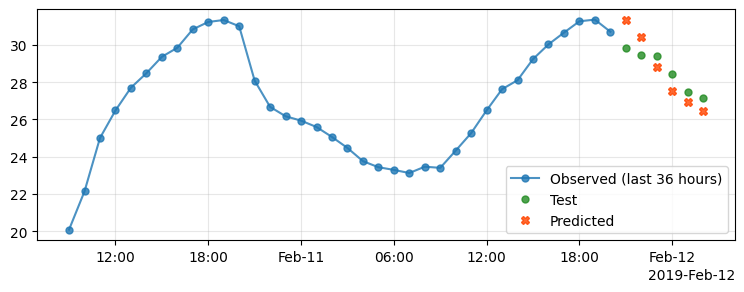

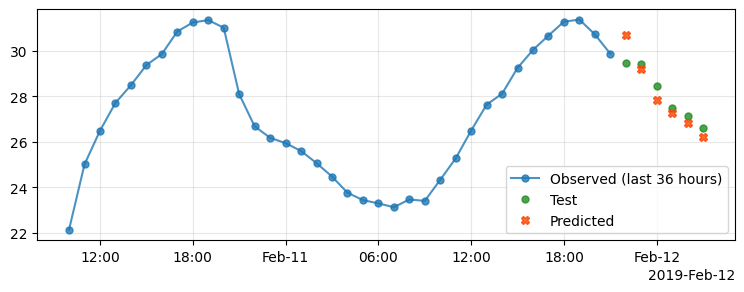

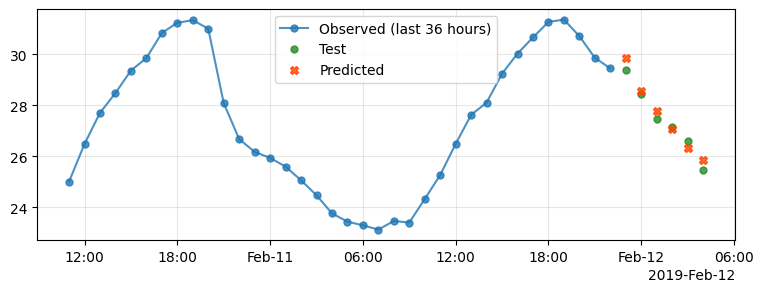

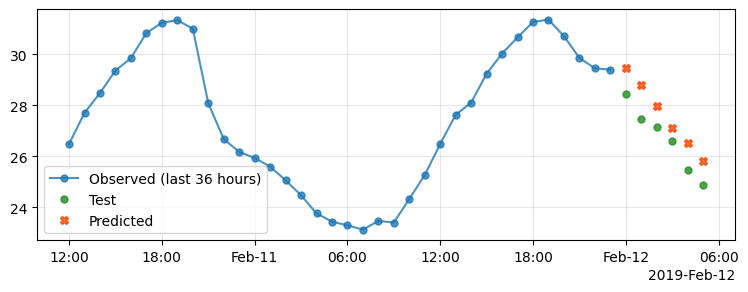

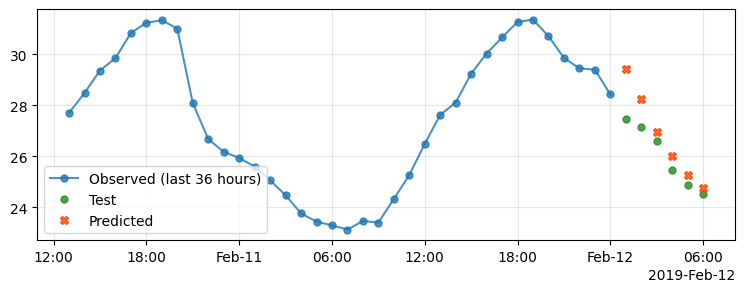

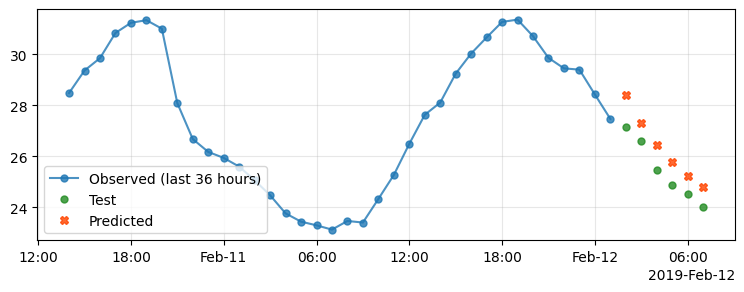

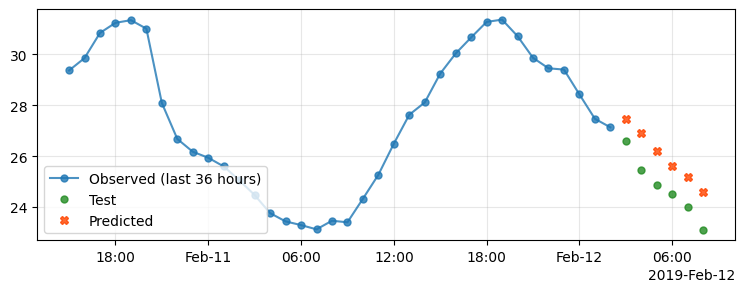

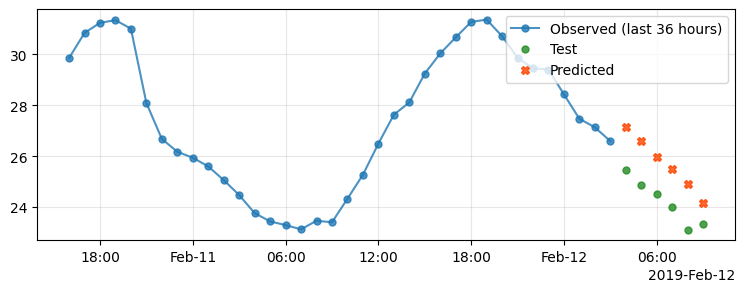

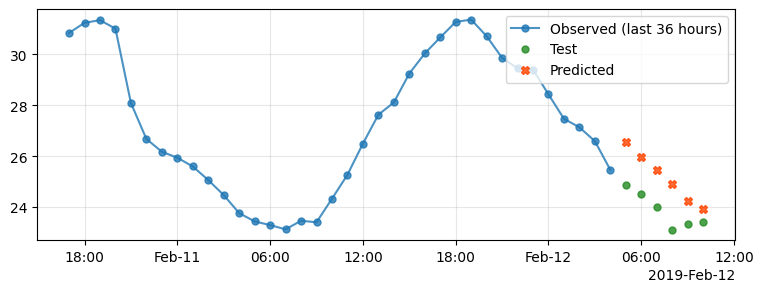

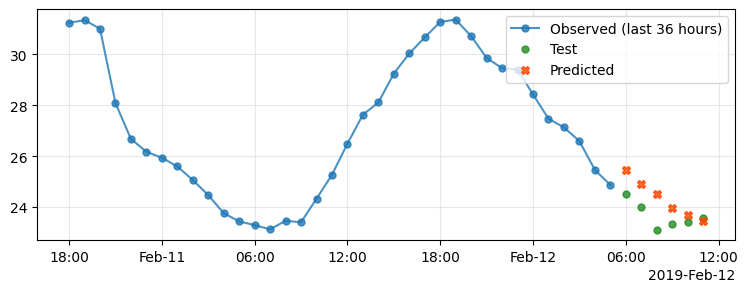

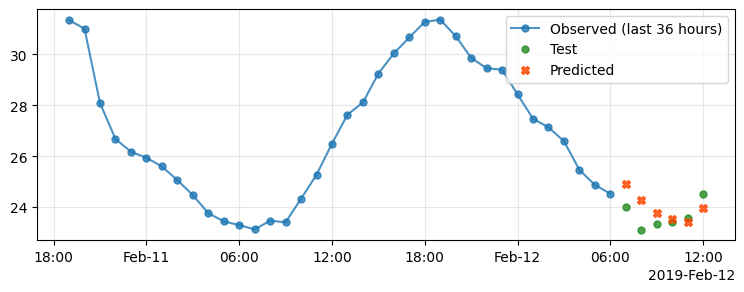

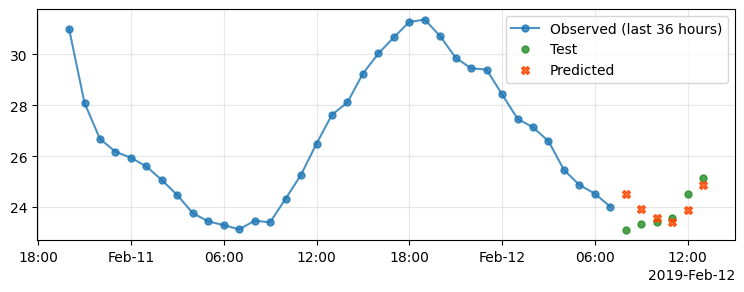

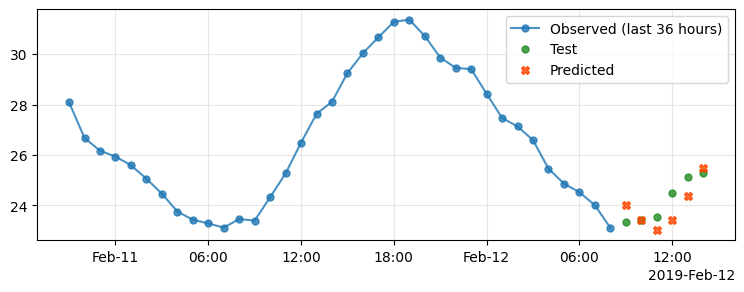

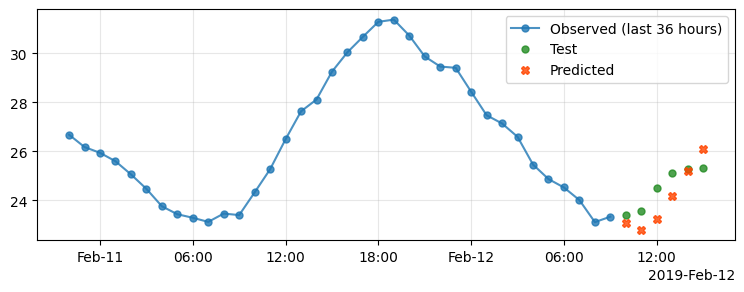

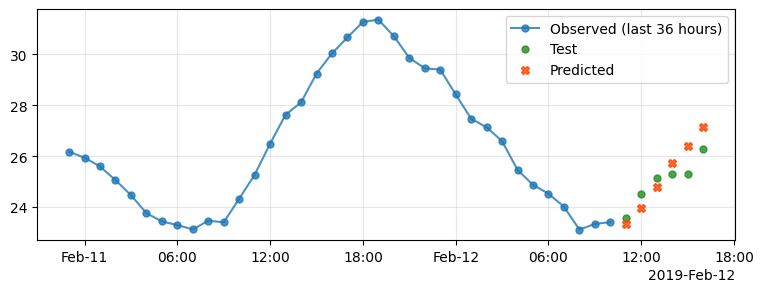

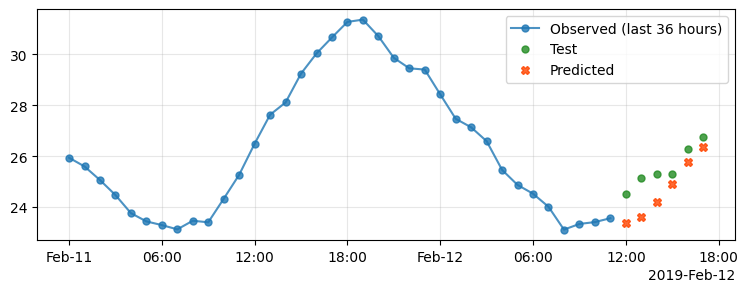

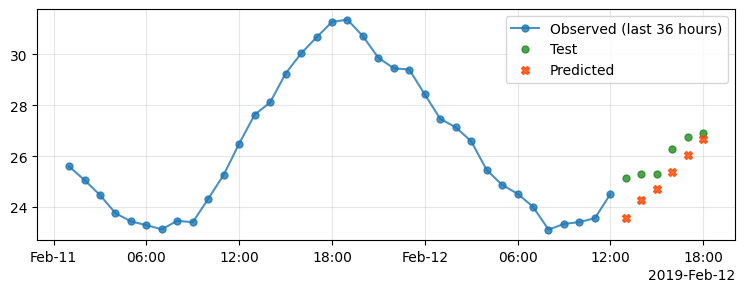

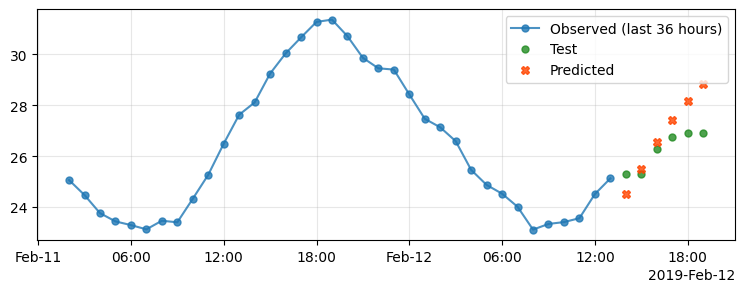

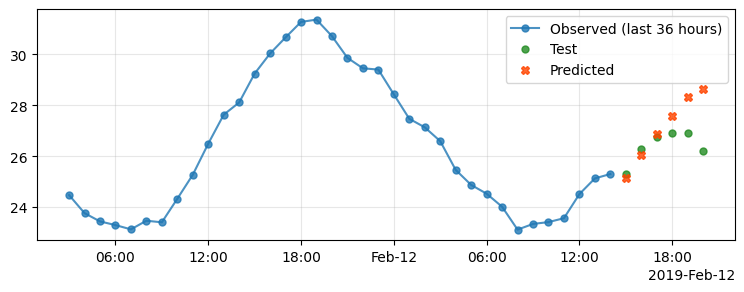

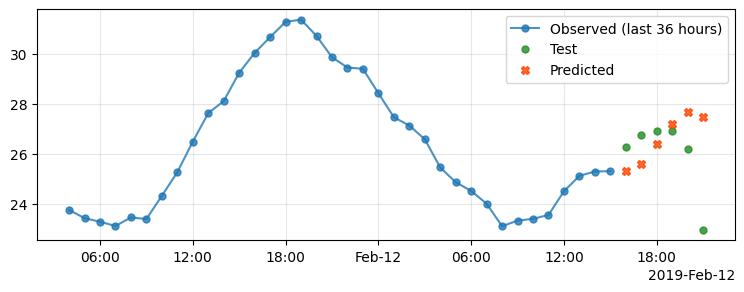

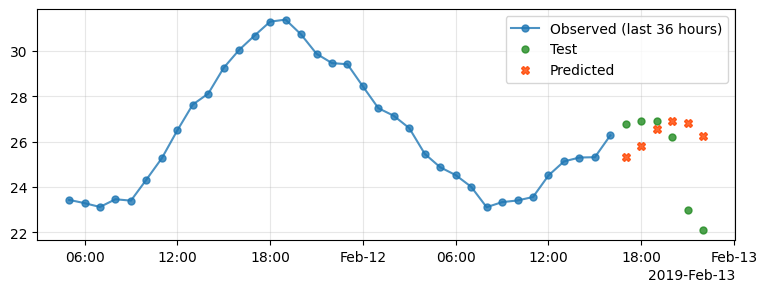

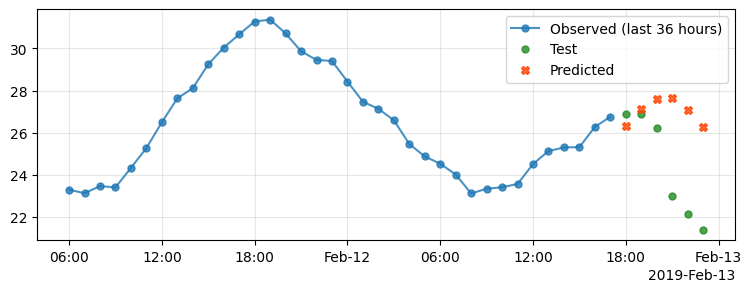

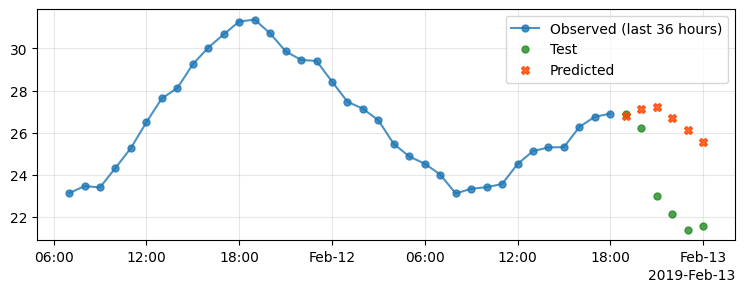

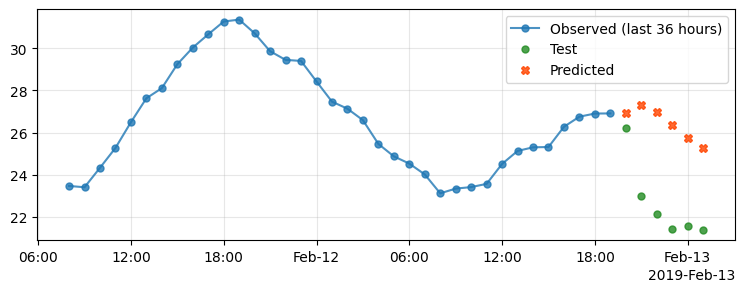

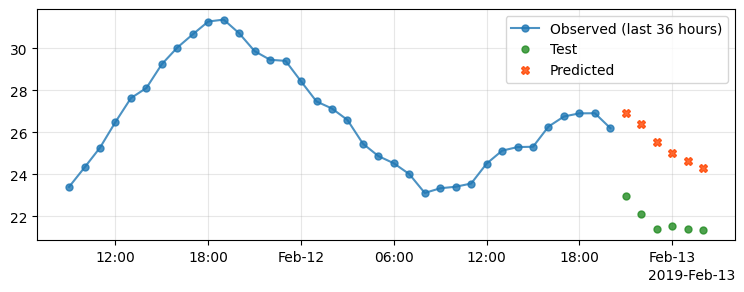

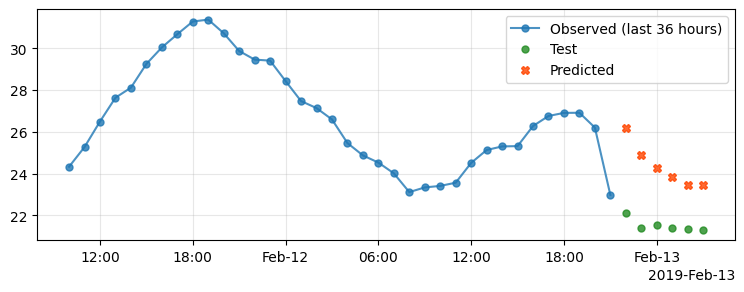

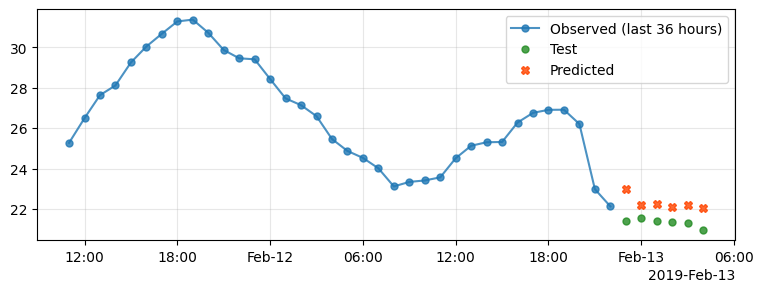

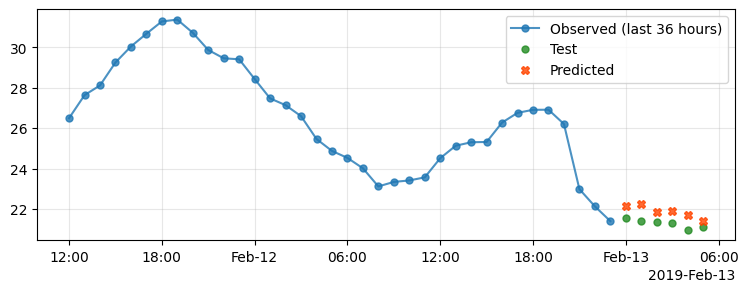

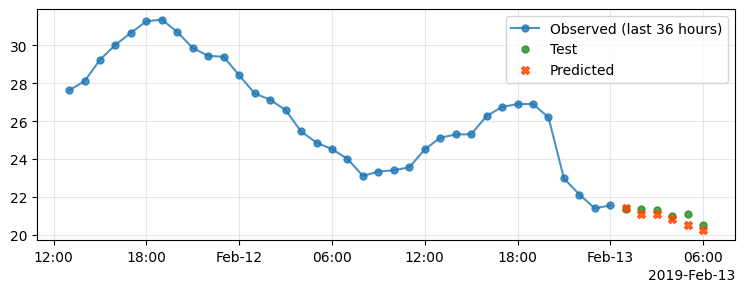

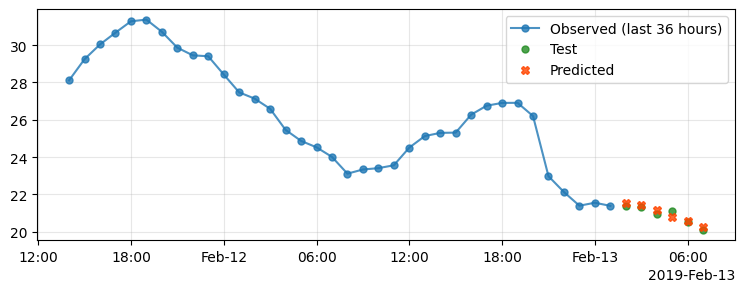

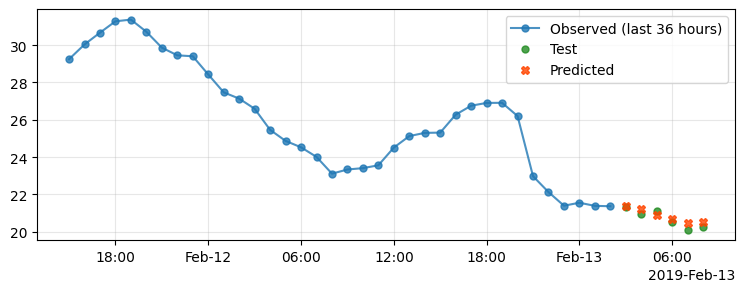

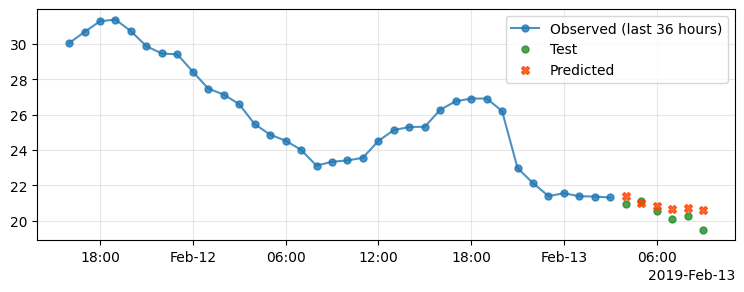

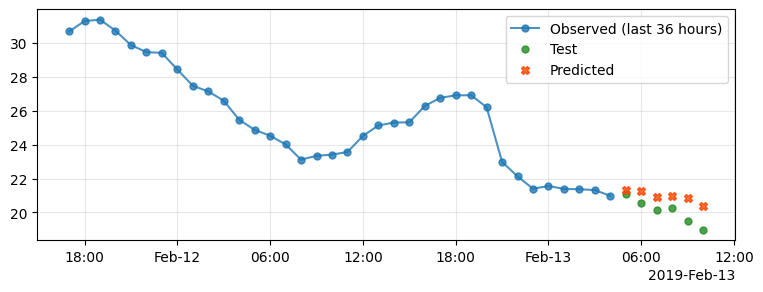

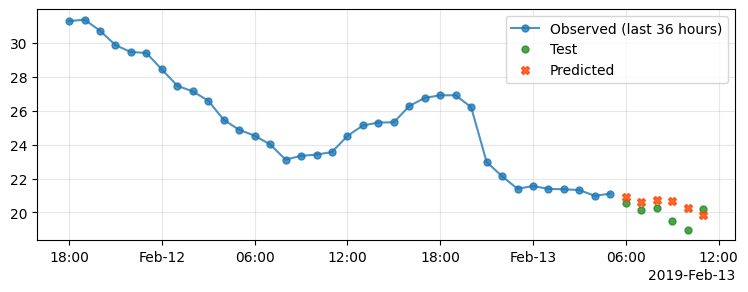

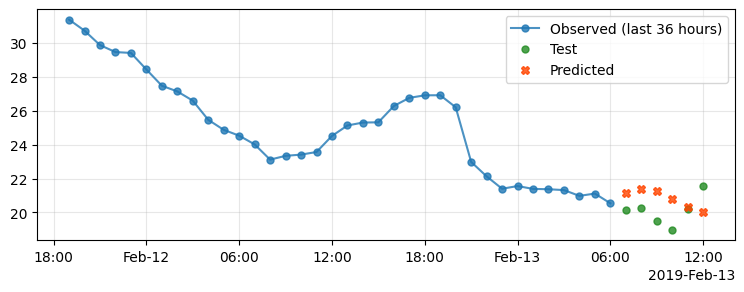

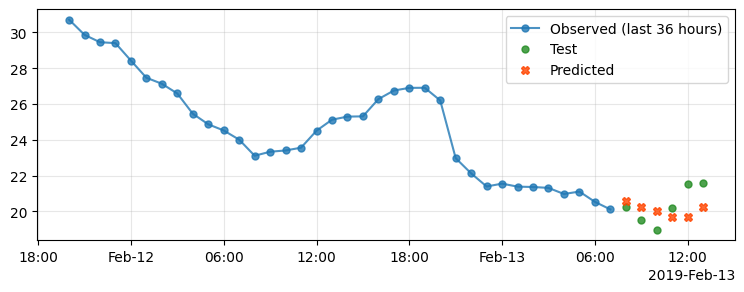

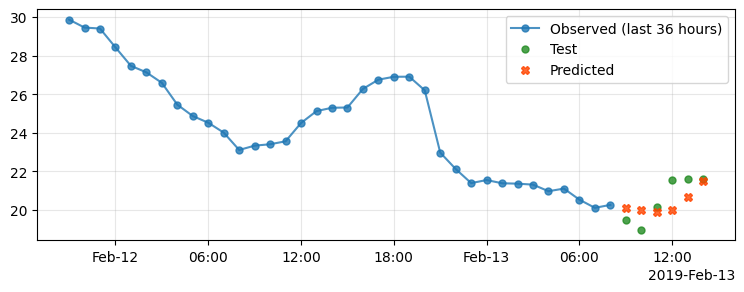

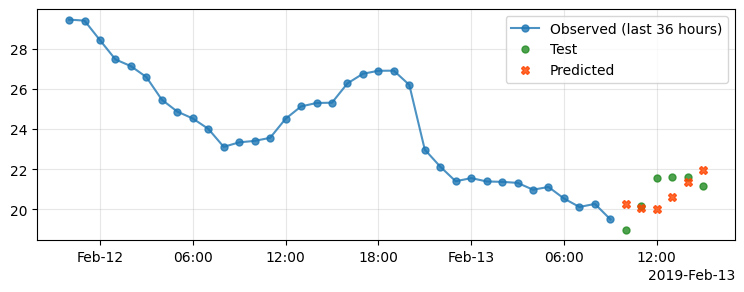

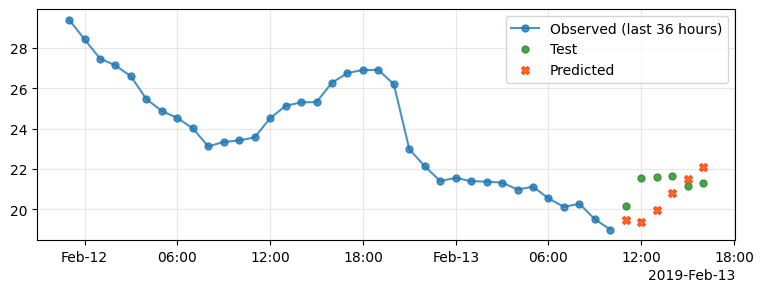

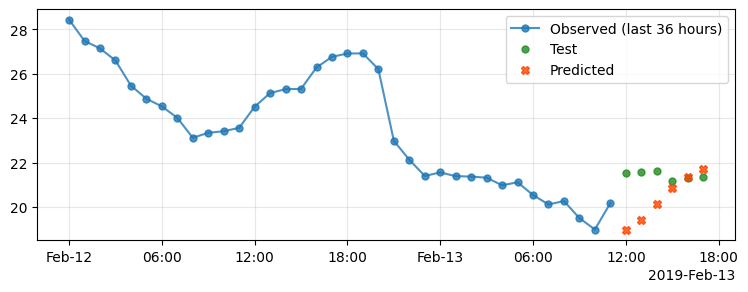

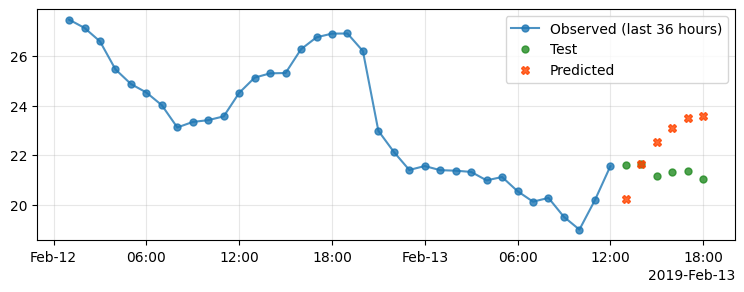

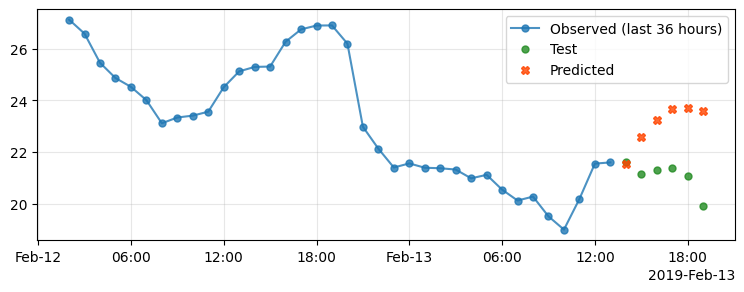

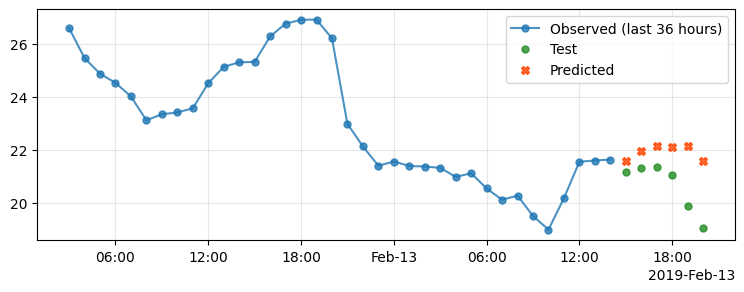

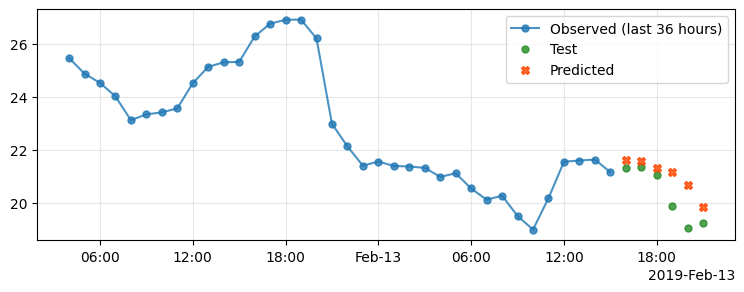

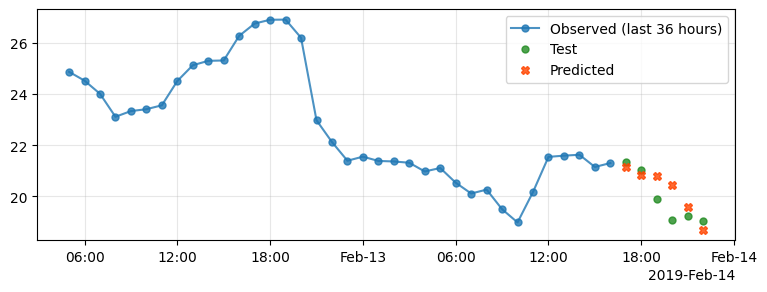

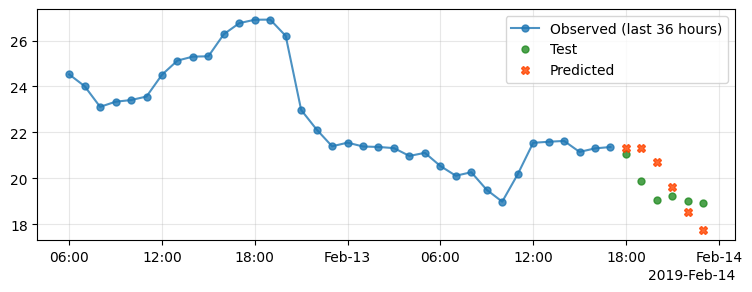

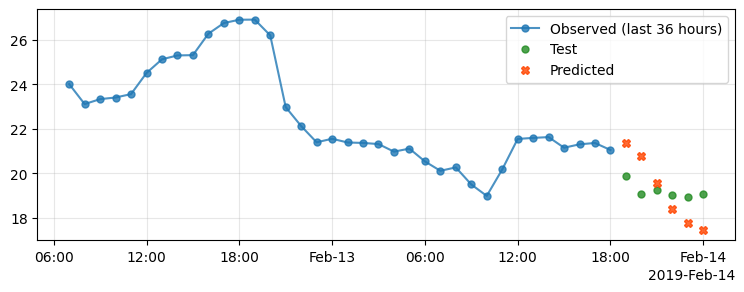

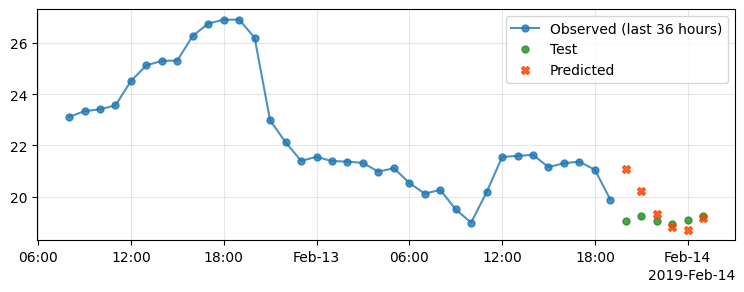

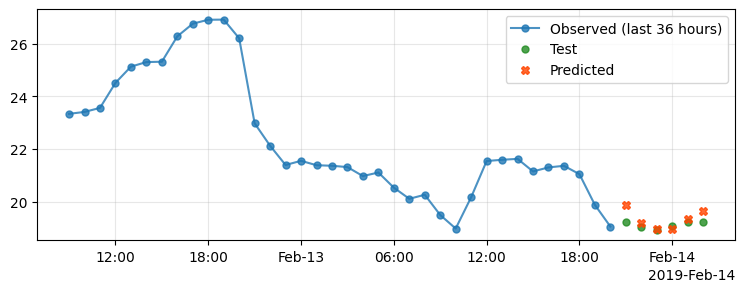

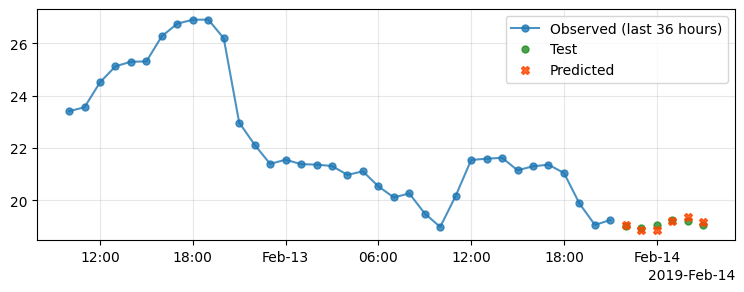

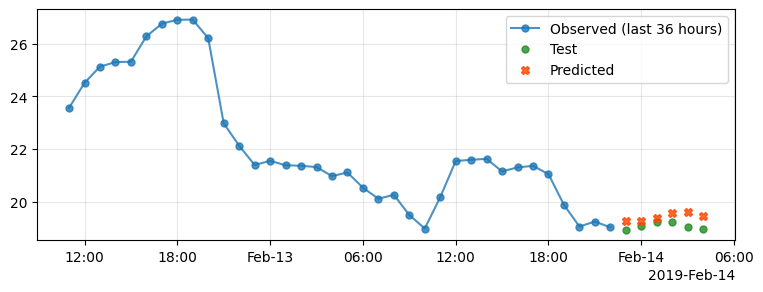

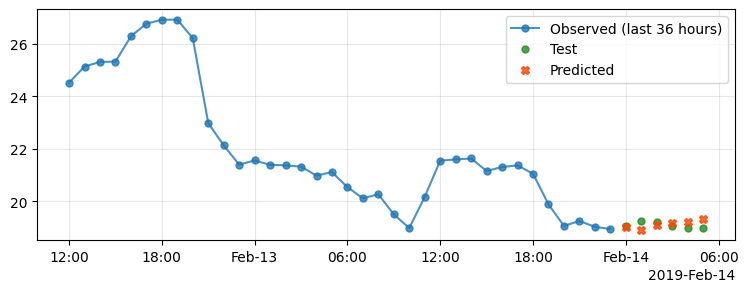

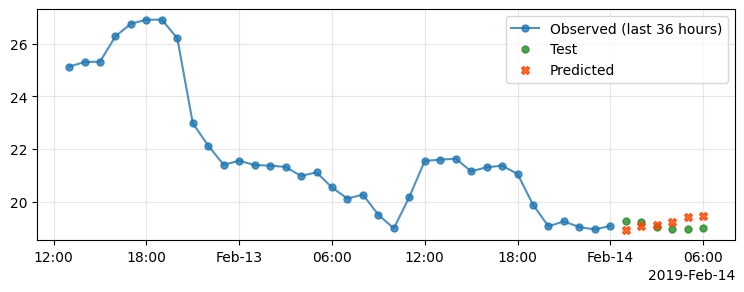

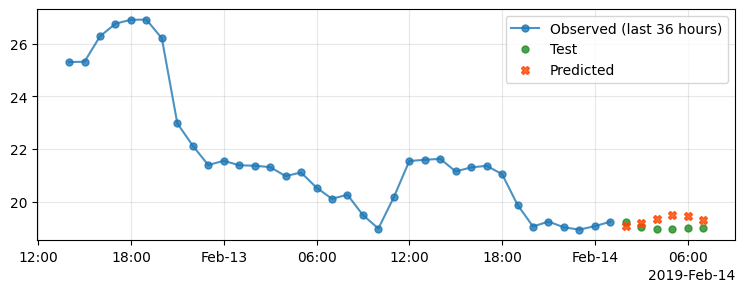

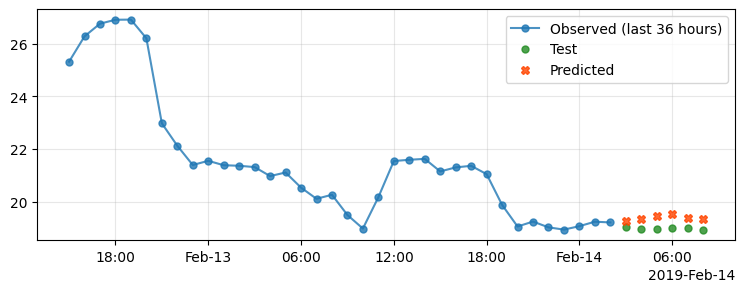

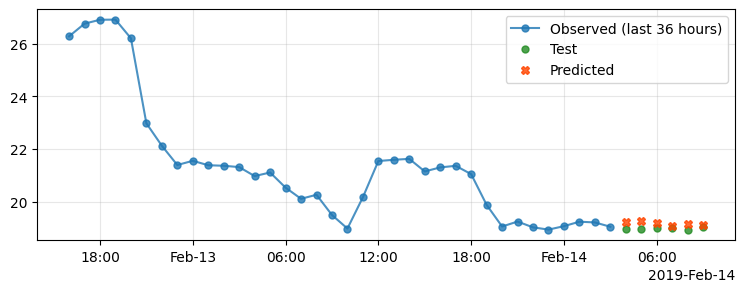

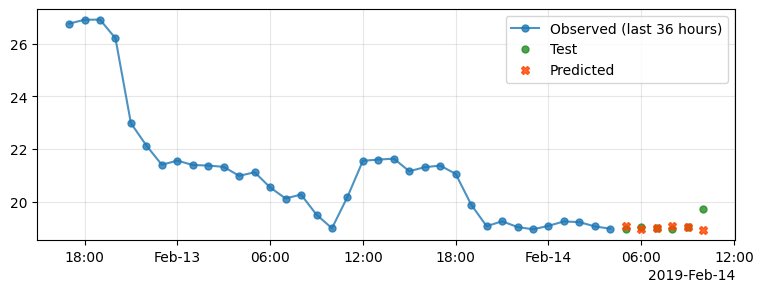

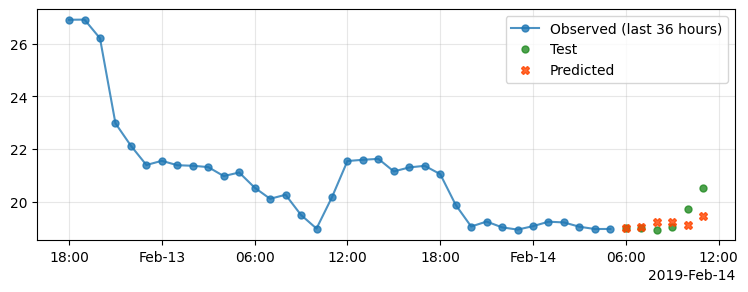

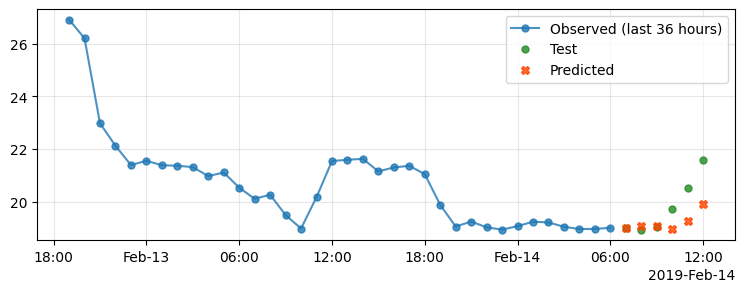

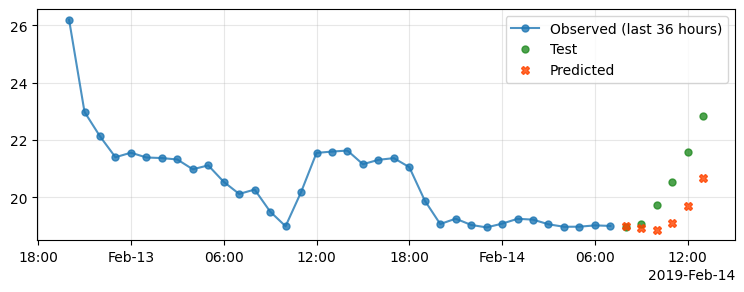

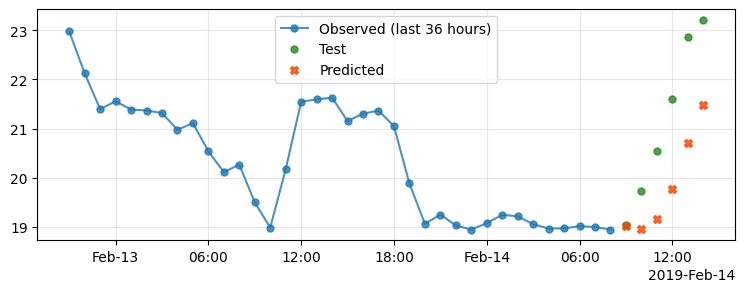

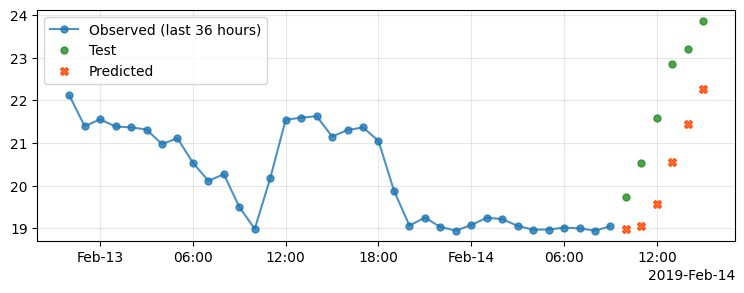

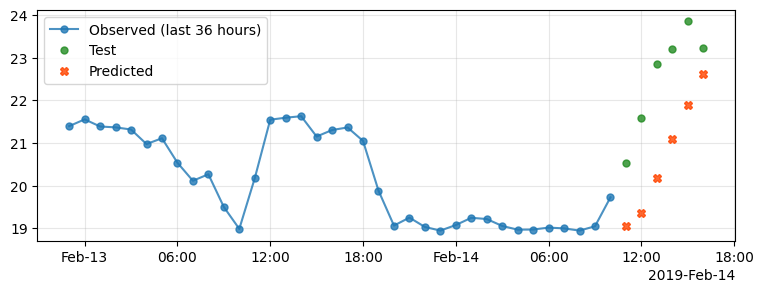

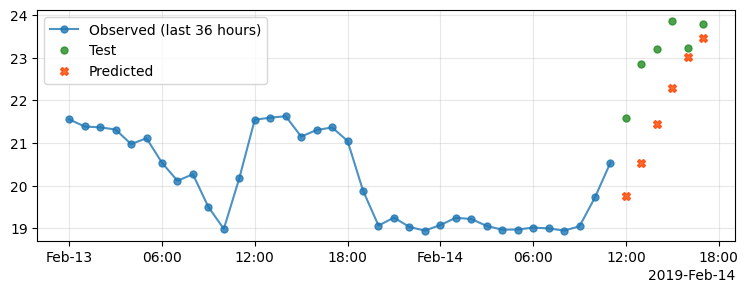

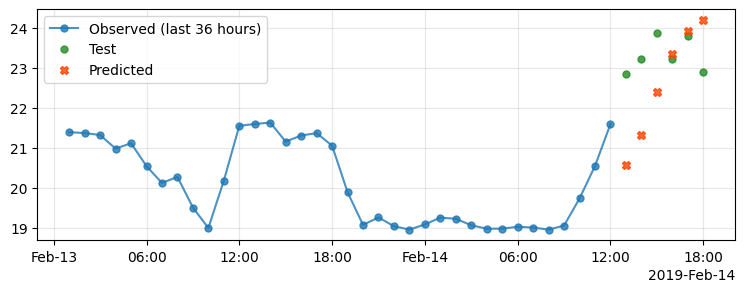

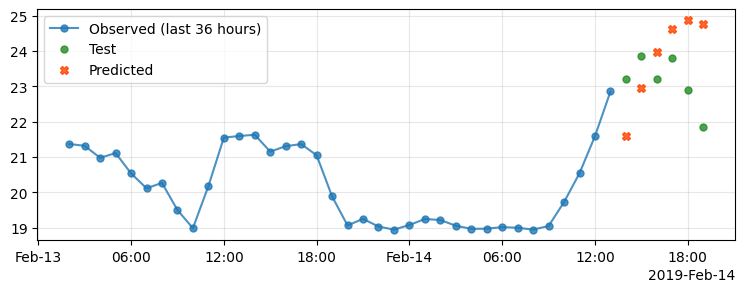

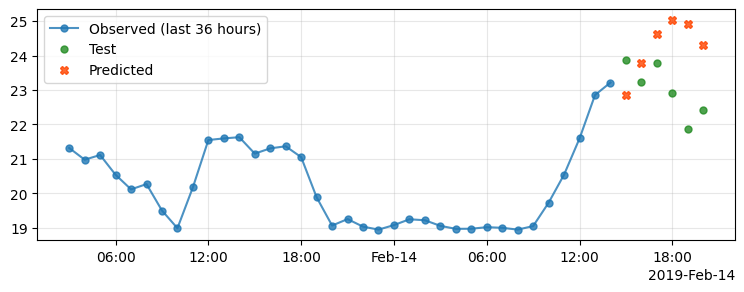

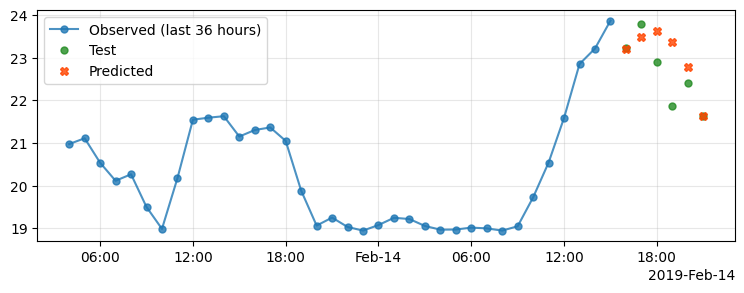

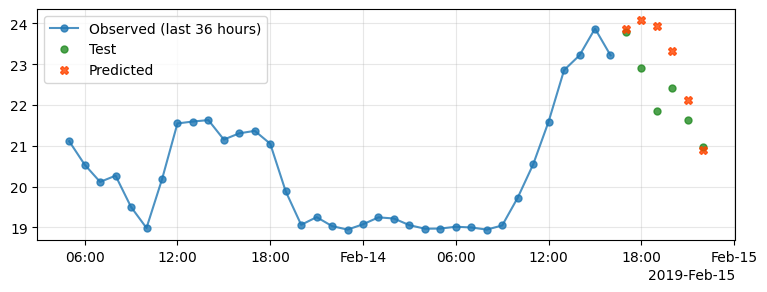

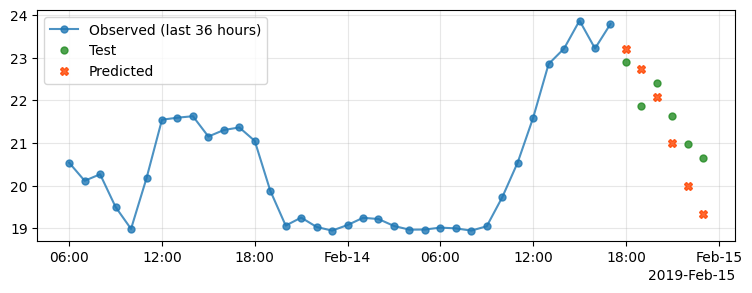

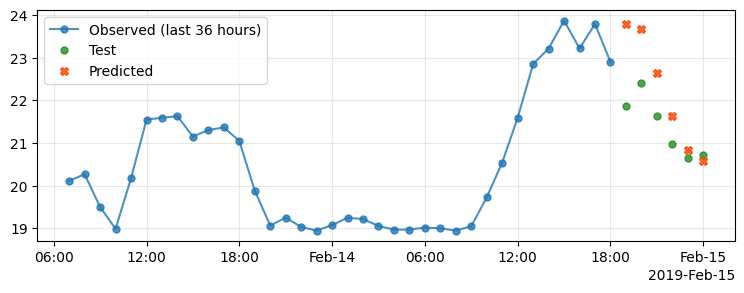

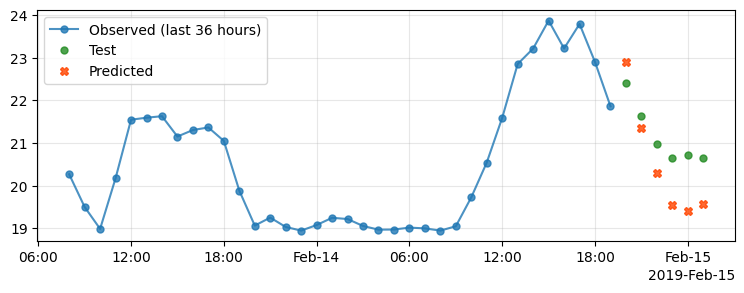

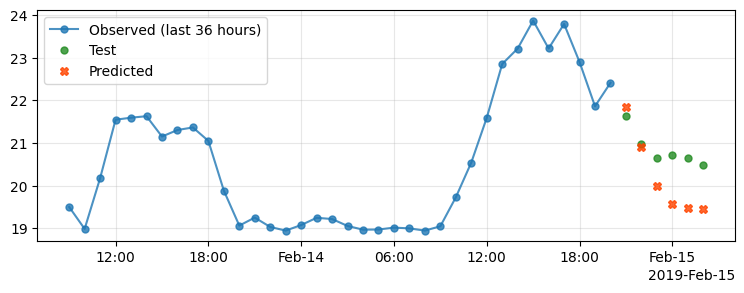

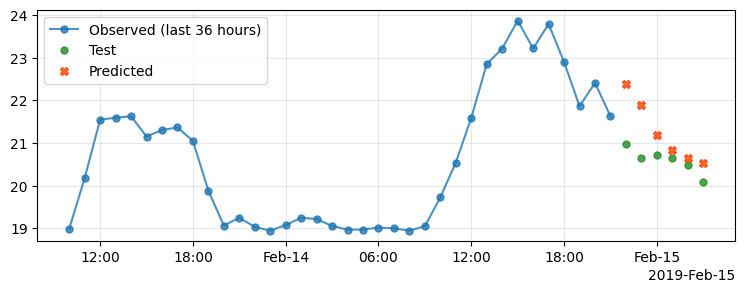

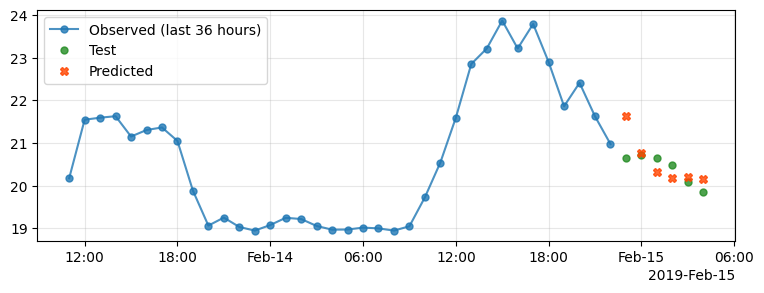

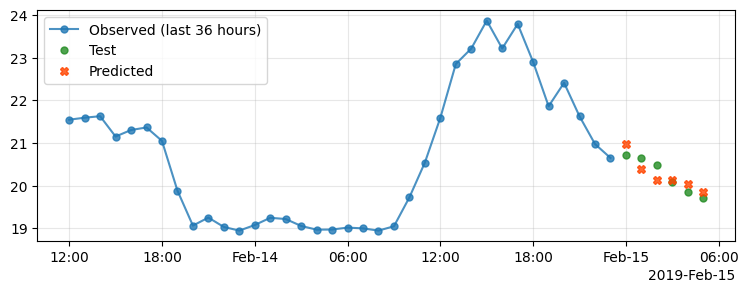

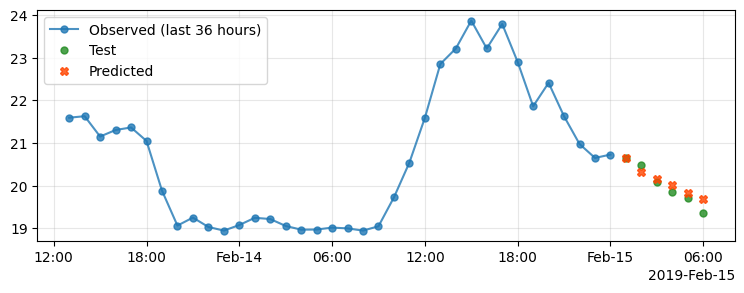

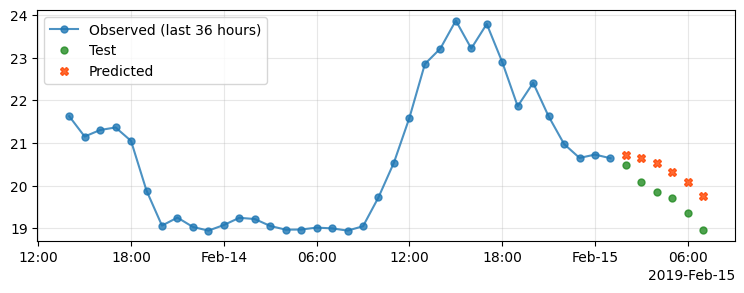

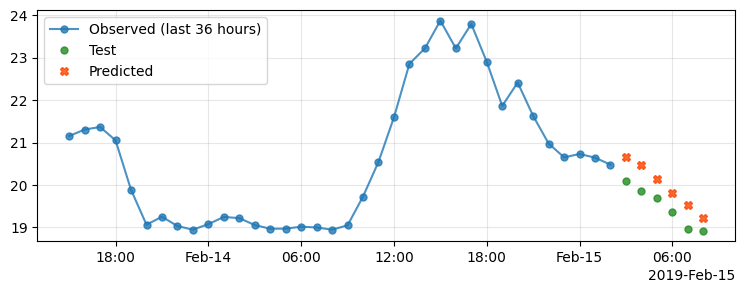

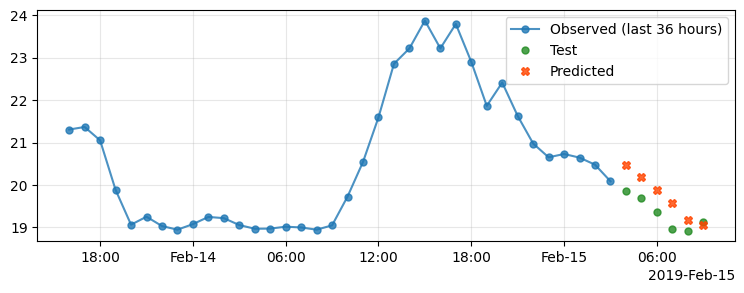

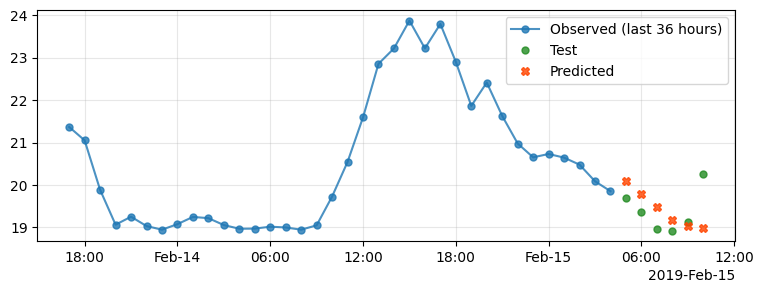

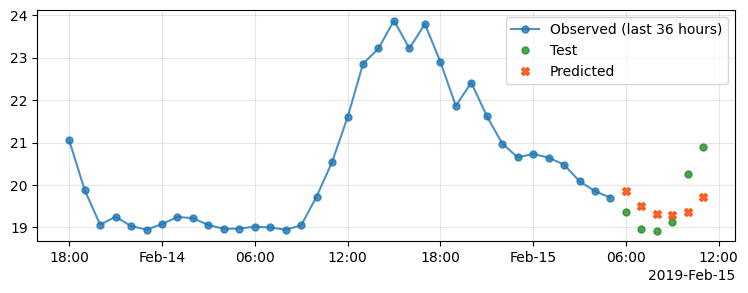

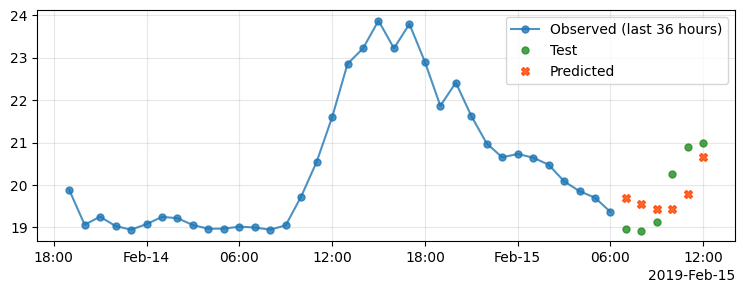

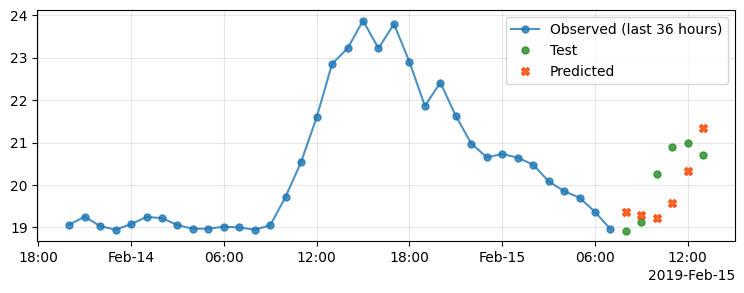

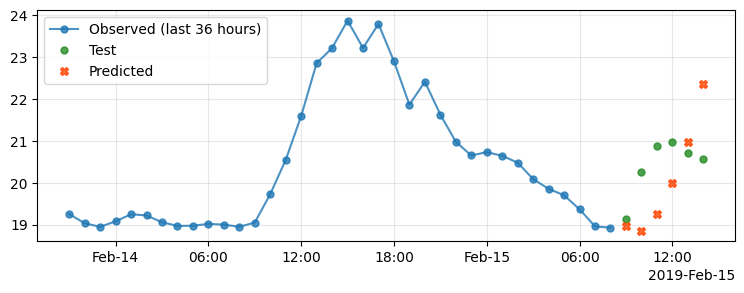

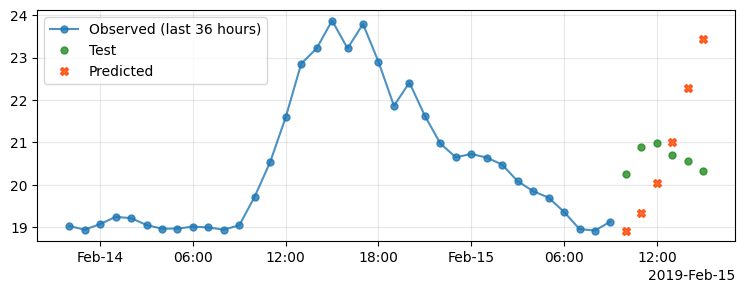

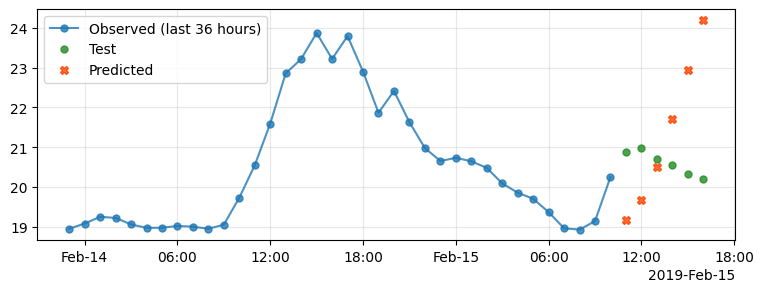

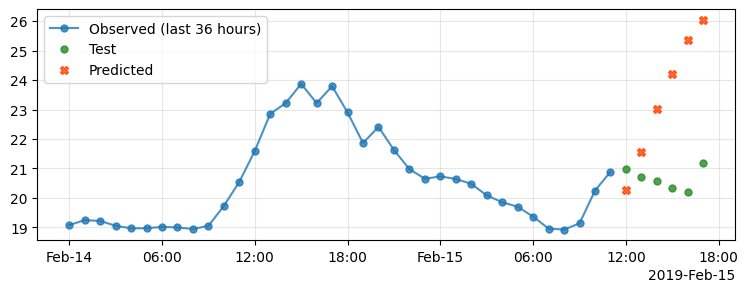

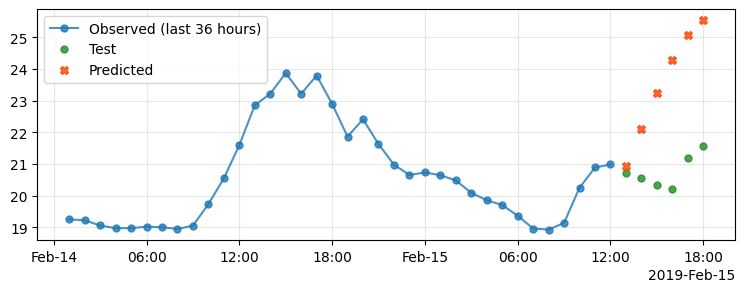

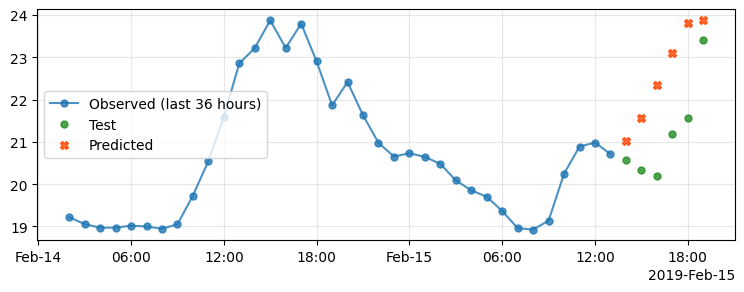

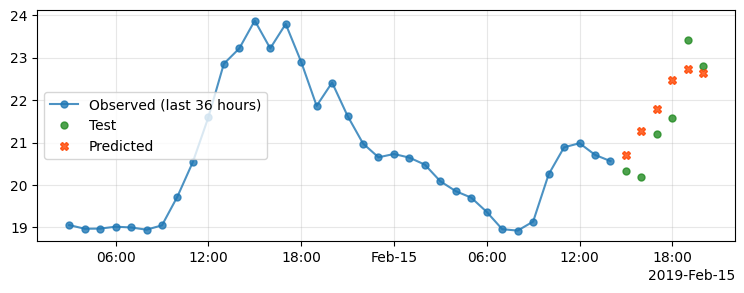

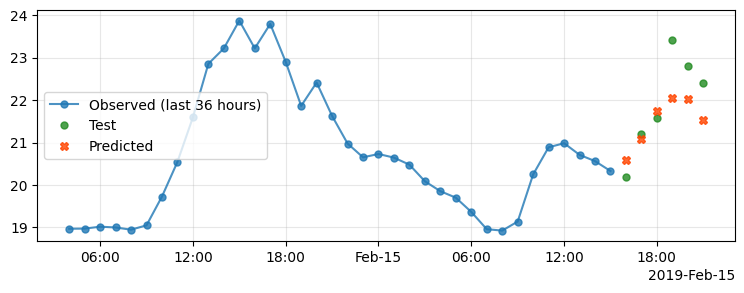

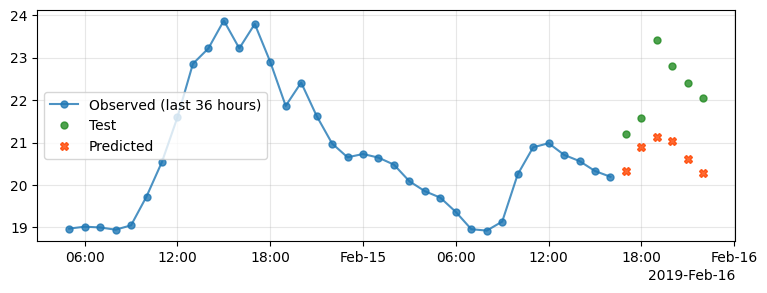

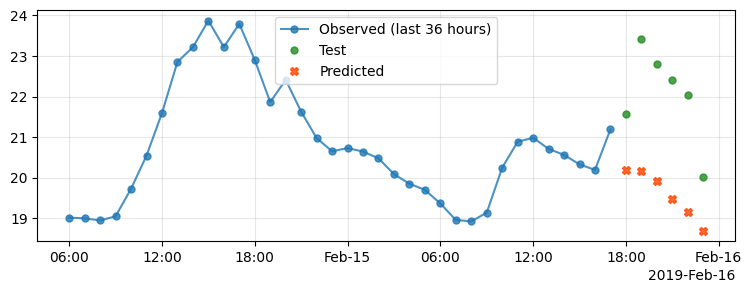

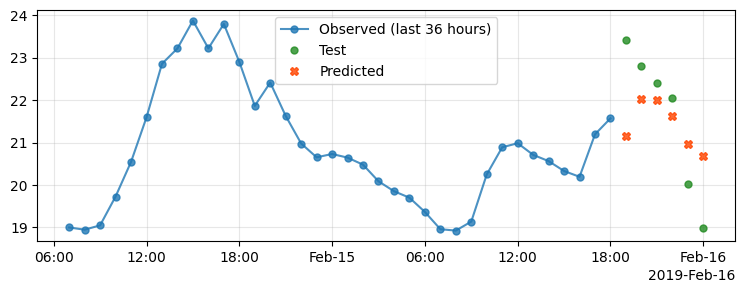

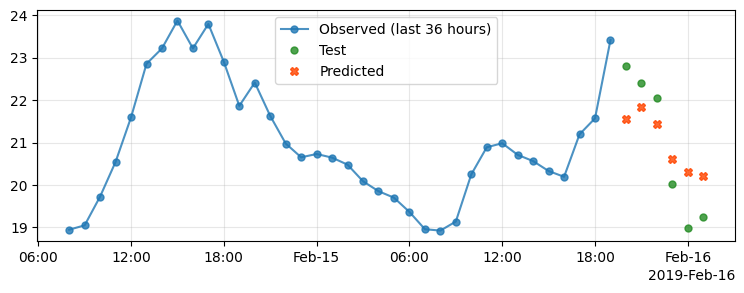

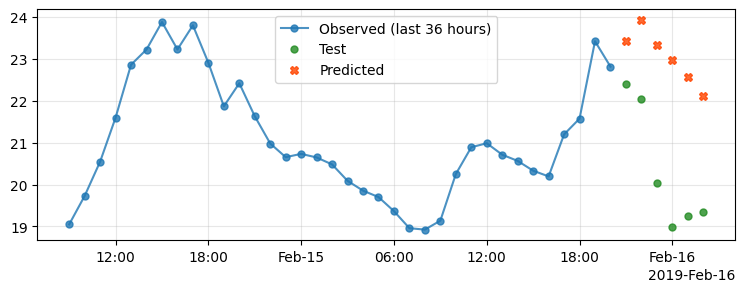

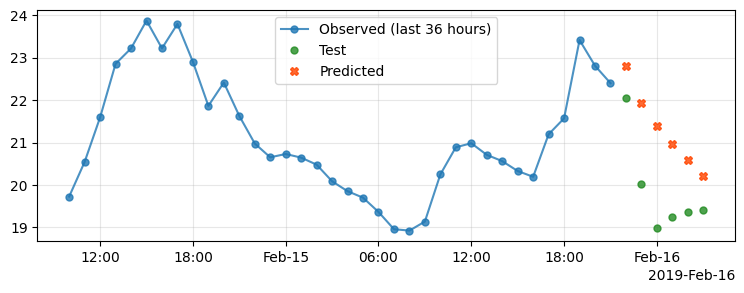

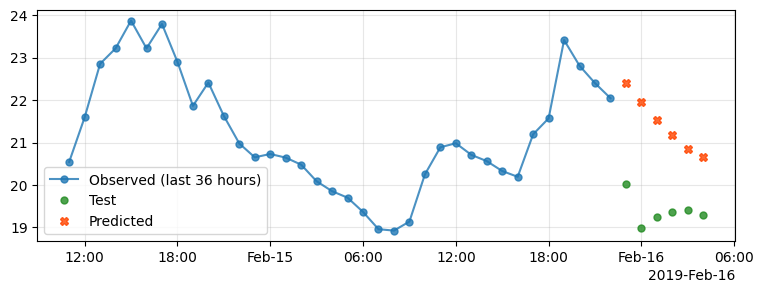

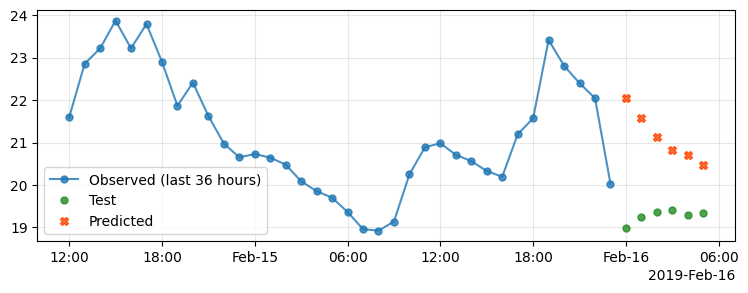

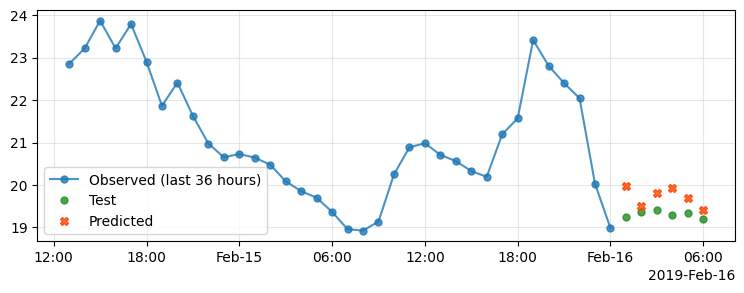

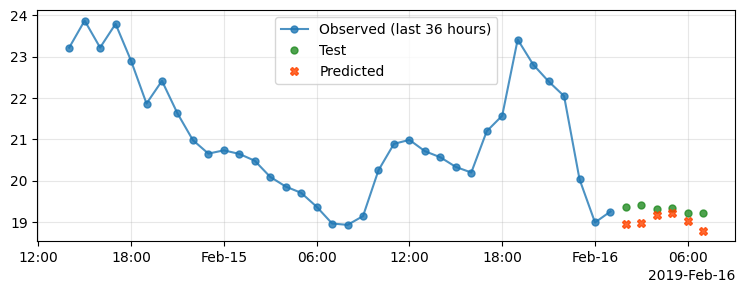

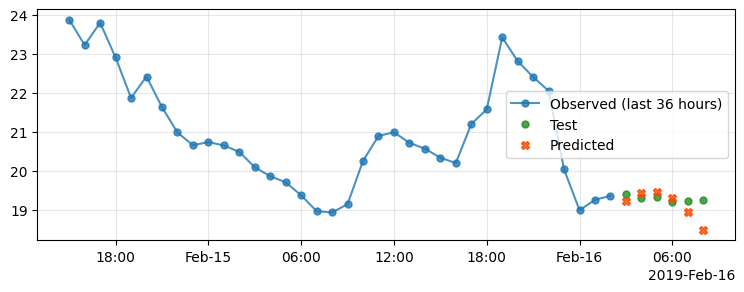

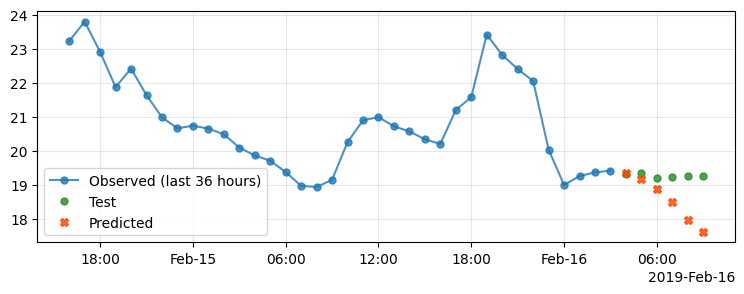

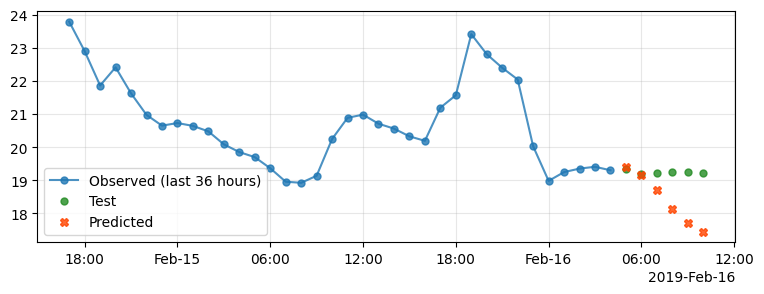

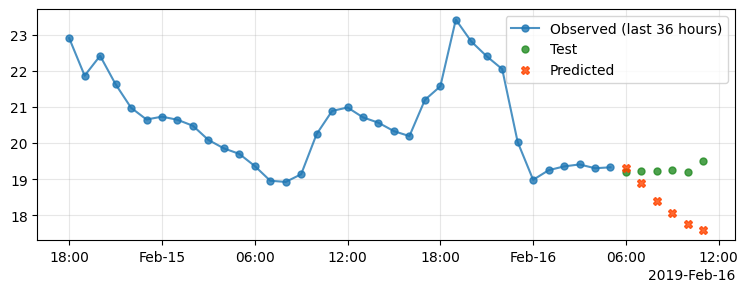

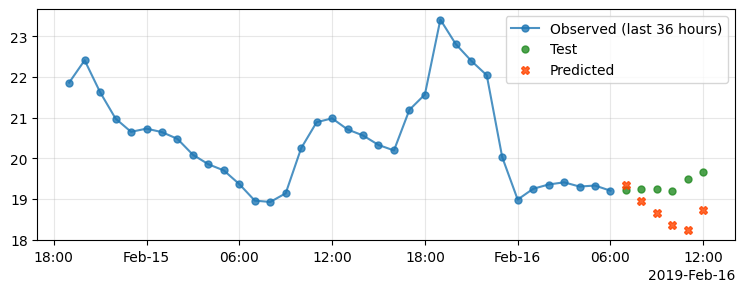

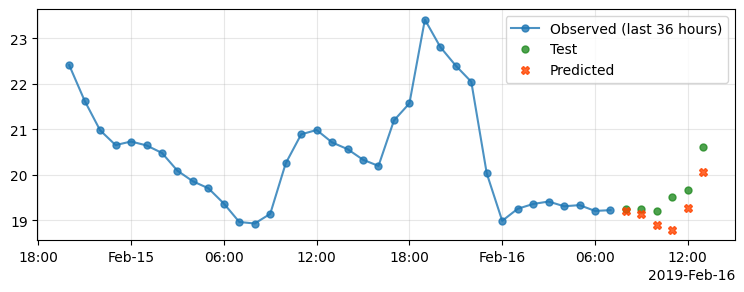

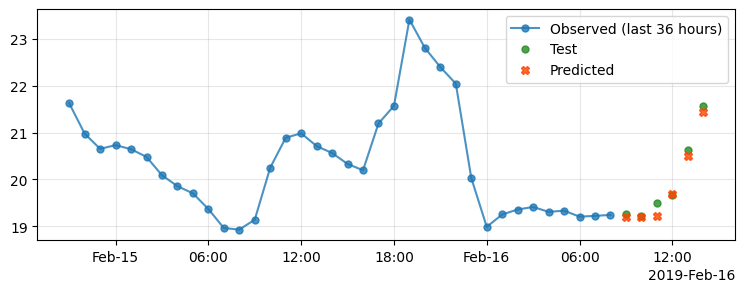

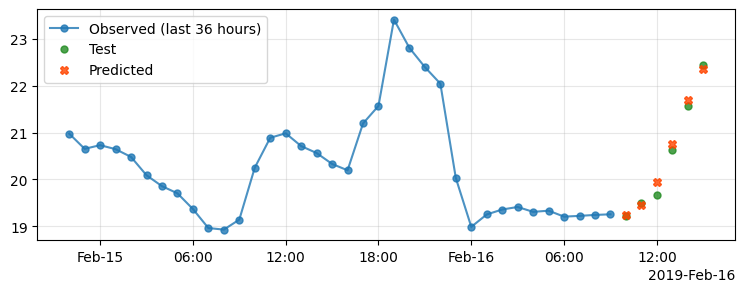

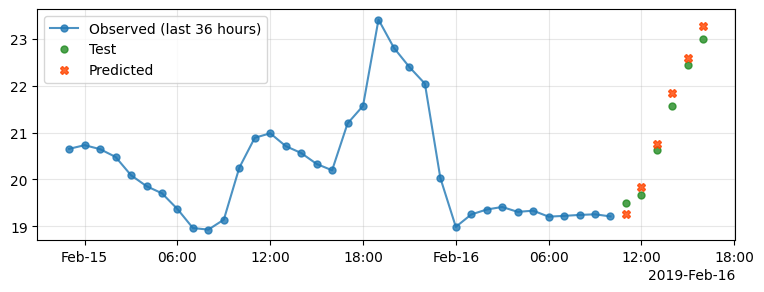

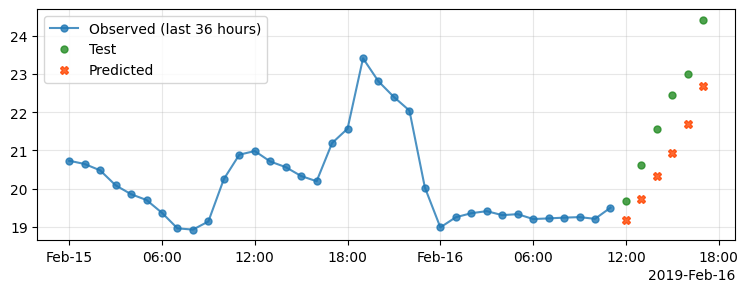

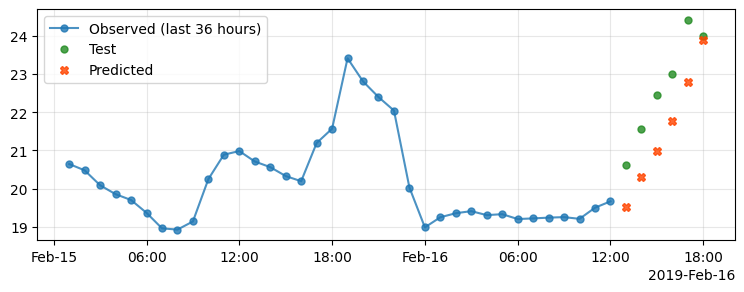

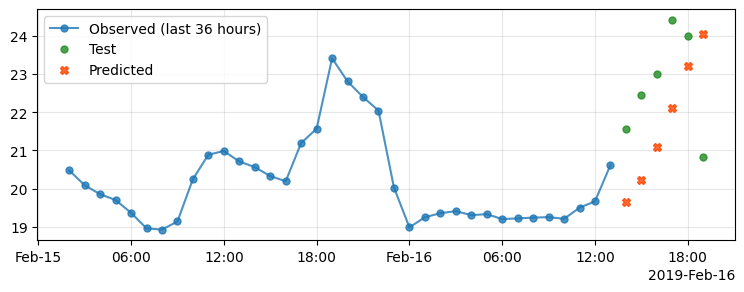

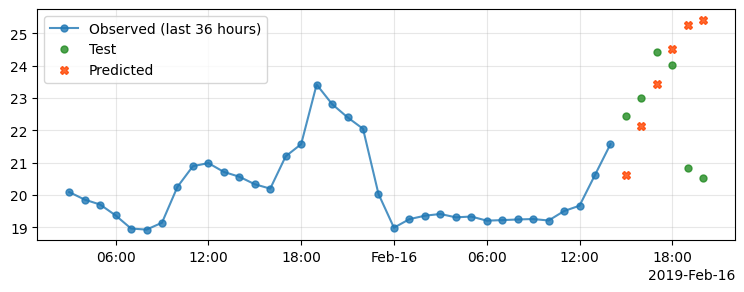

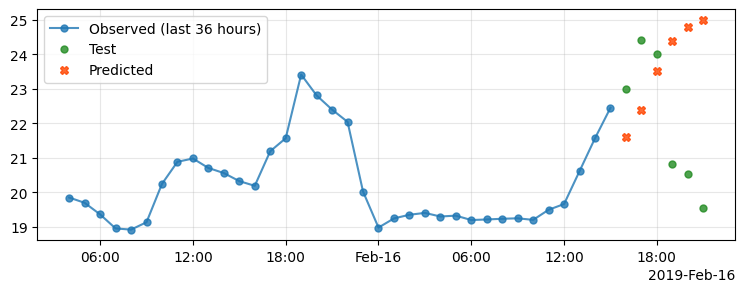

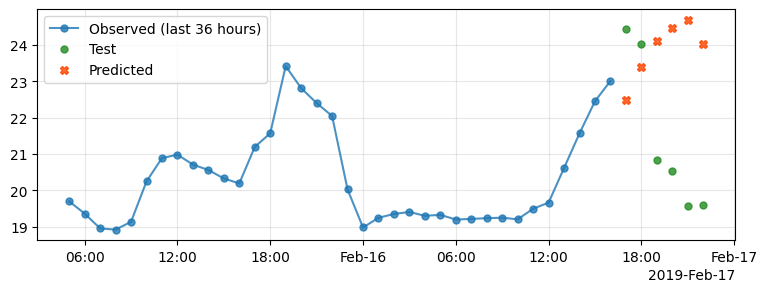

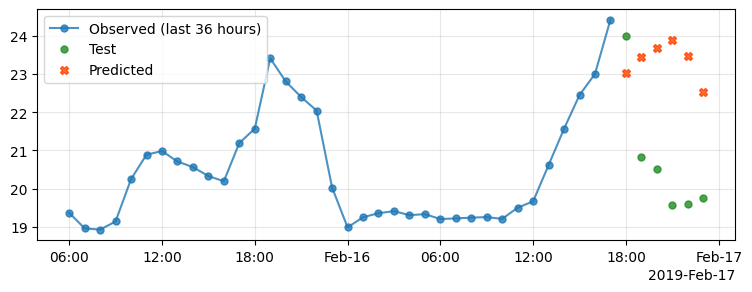

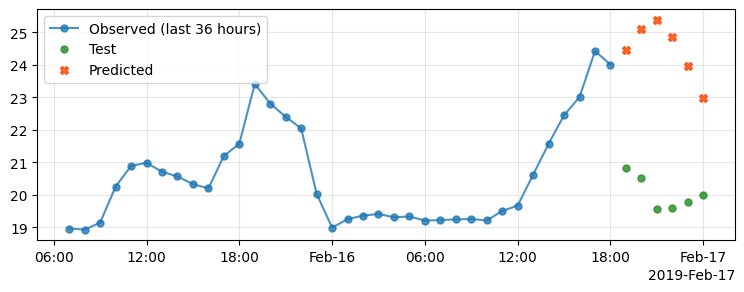

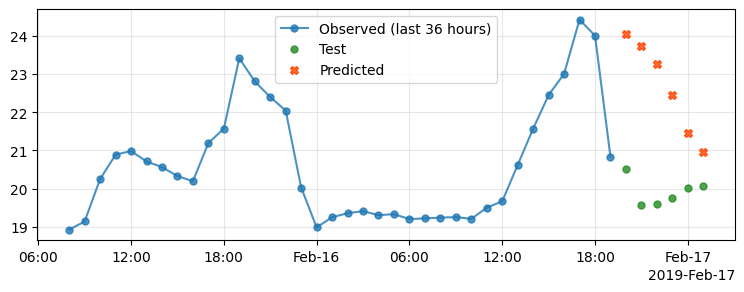

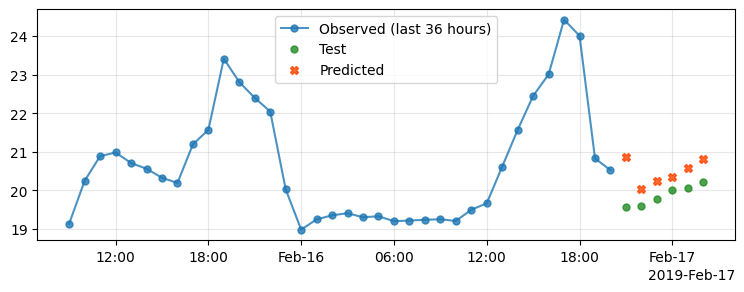

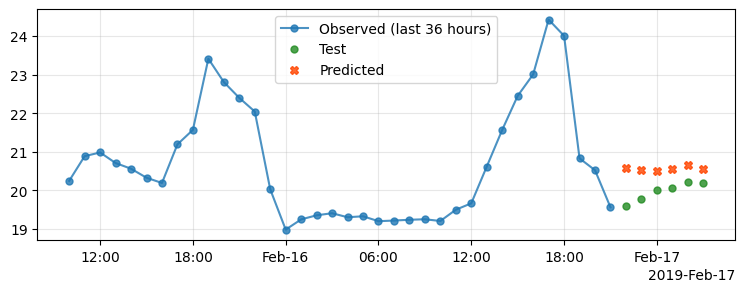

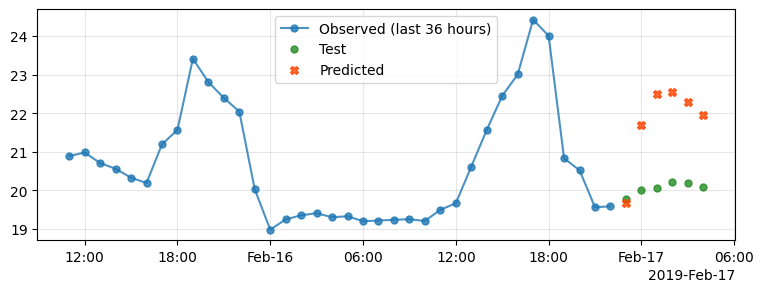

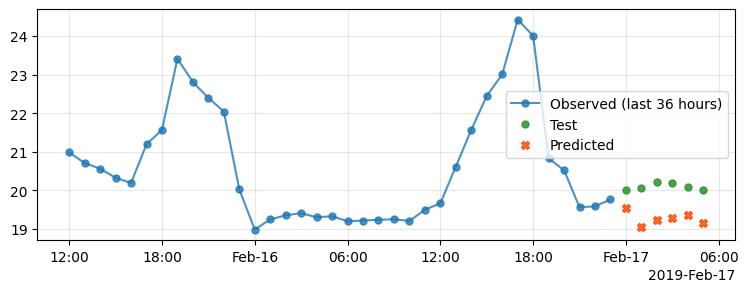

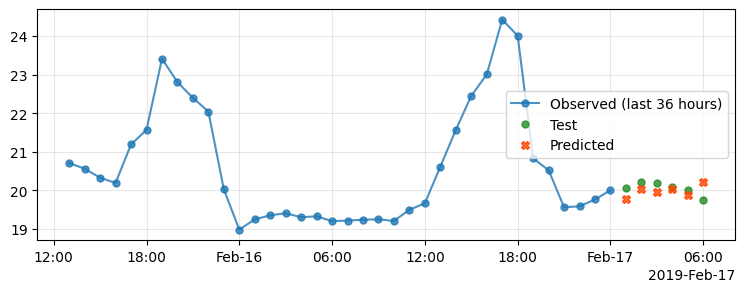

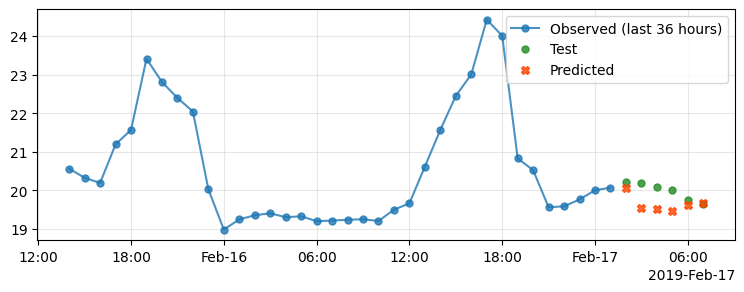

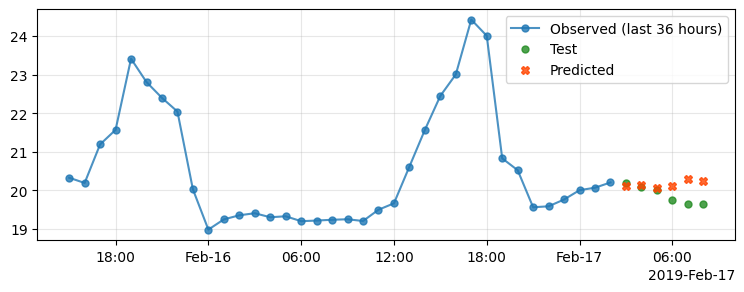

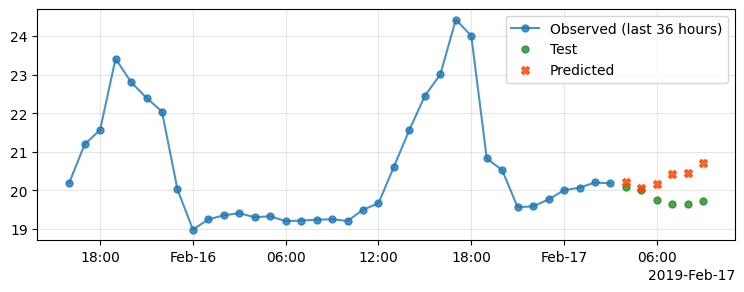

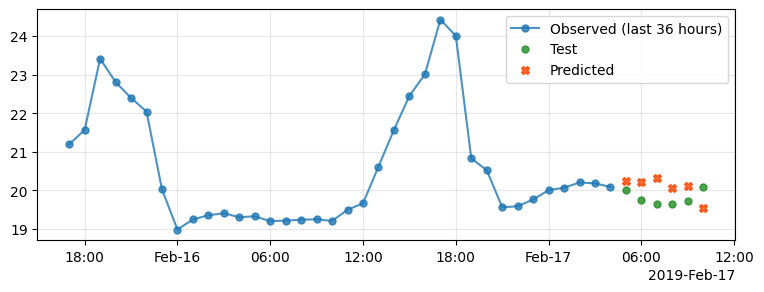

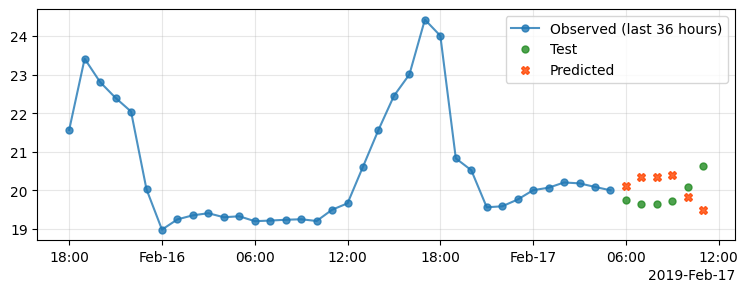

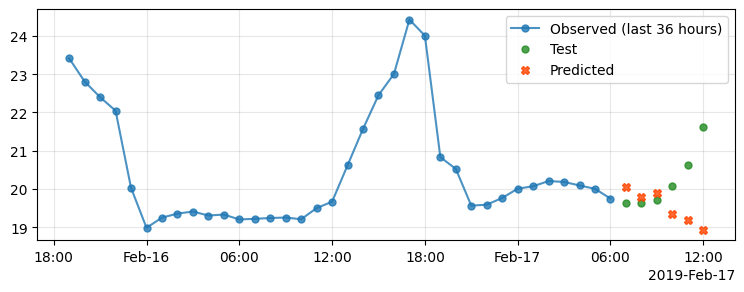

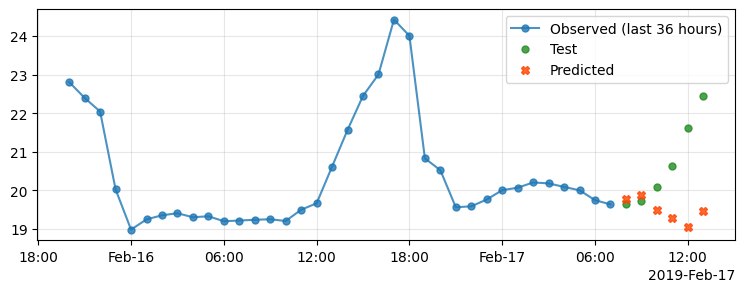

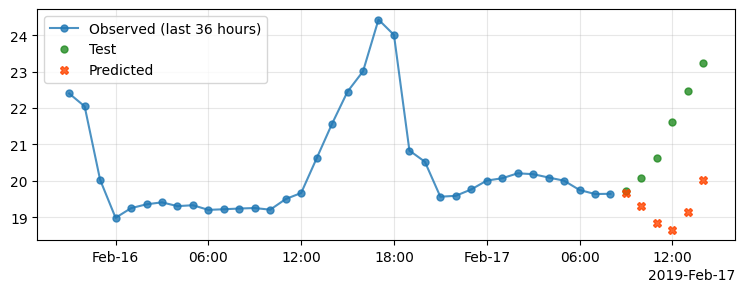

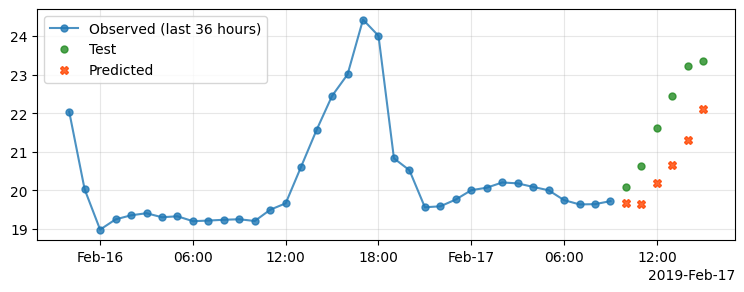

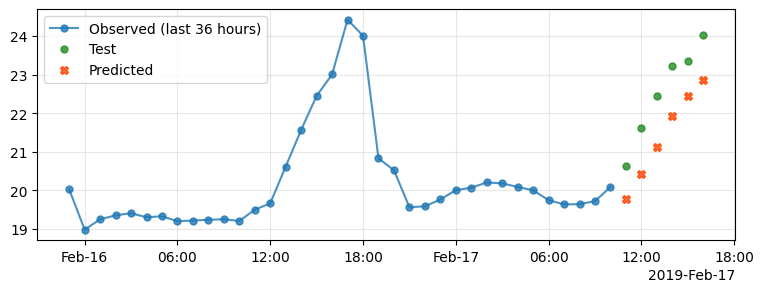

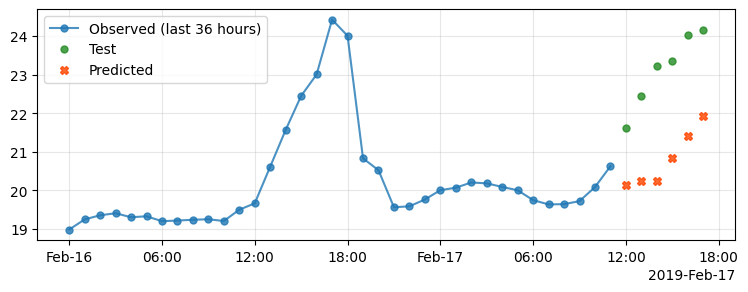

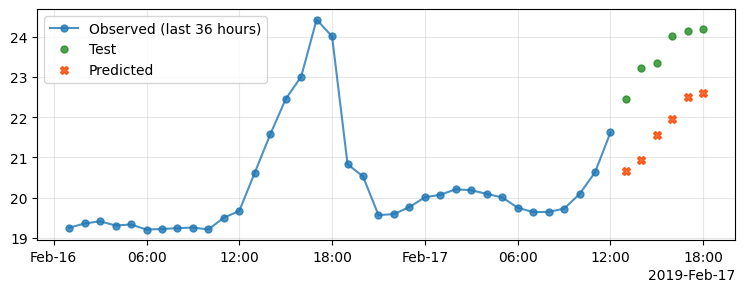

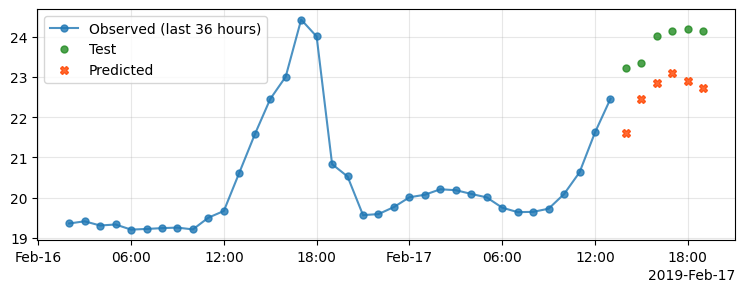

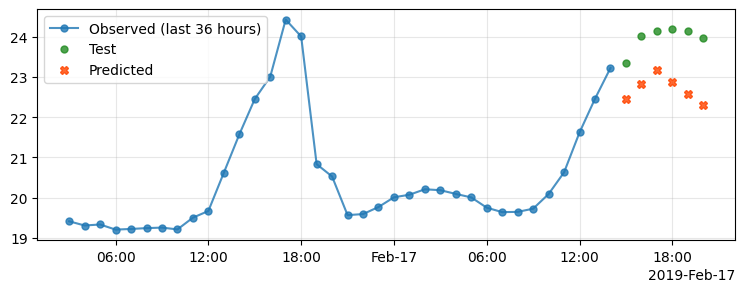

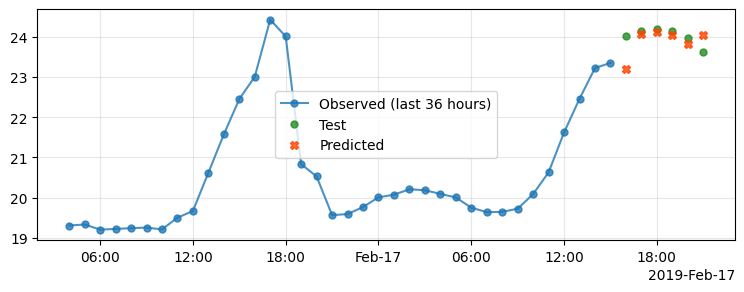

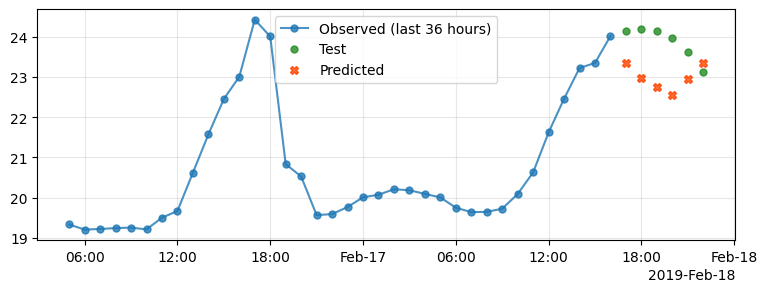

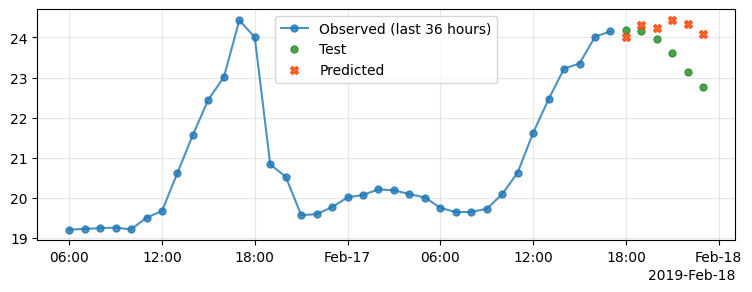

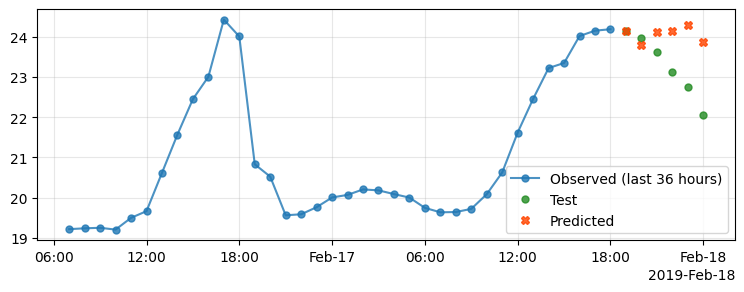

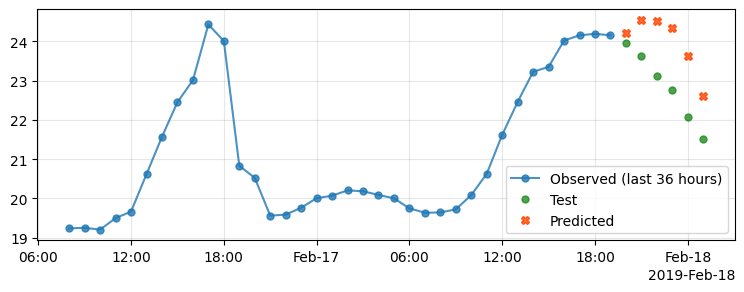

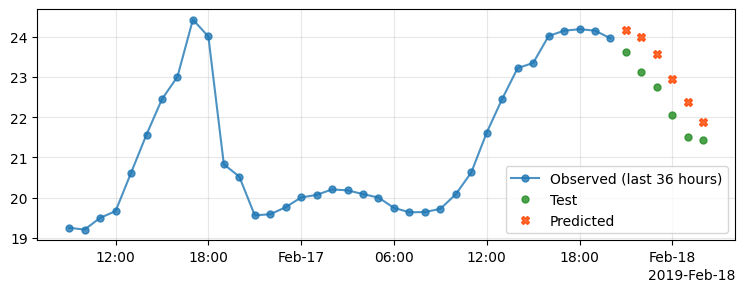

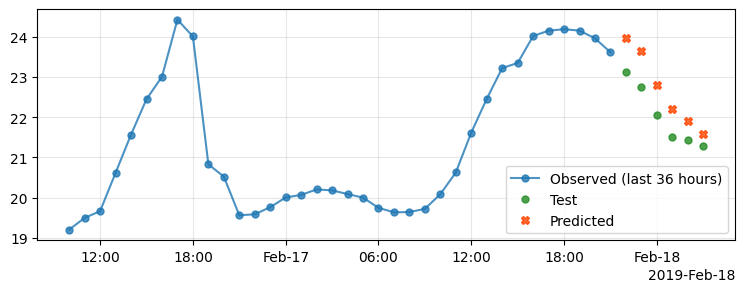

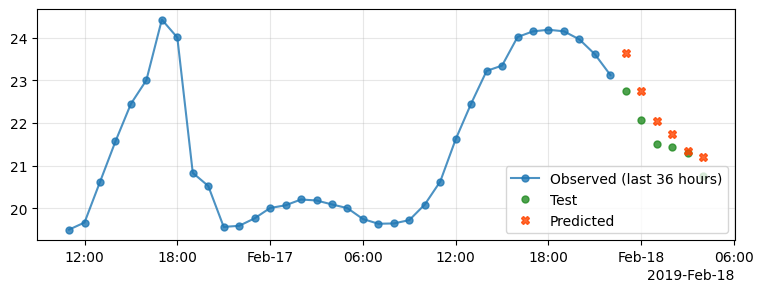

In [13]:
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

for i in y_pred.index[-200:-20]:
    pred = y_pred.loc[[i]]
    start_date = pred.timestamp.unique()[0] + np.timedelta64(1,'h')
    pred = pred.drop("timestamp", axis=1).T
    pred.index = pd.date_range(start=start_date, periods=6, freq="H")
    pred.columns = ["temperature"]

    past_data = 12*3
    train_plot = test[pred.index[0]-np.timedelta64(past_data,'h'):pred.index[0]-np.timedelta64(1,'h')]
    test_plot = test[pred.index[0]:pred.index[-1]]

    fig, ax = plt.subplots(figsize=(9,3))
    ax.plot(train_plot, label=f"Observed (last {past_data} hours)", marker=".", markersize=10, alpha=0.8)
    ax.plot(test_plot, label="Test", ls="", marker=".", markersize=10, color="forestgreen", alpha=0.8)
    ax.plot(pred, label="Predicted", ls="", marker="X", markersize=6, color="orangered", alpha=0.8)
    ax.legend()
    ax.grid(alpha=0.3)

mse = []
for i in y_pred.index:
    pred = y_pred.loc[[i]]
    start_date = pred.timestamp.unique()[0] + np.timedelta64(1,'h')
    pred = pred.drop("timestamp", axis=1).T
    pred.index = pd.date_range(start=start_date, periods=6, freq="H")
    pred.columns = ["temperature"]
    test_plot = test[pred.index[0]:pred.index[-1]]
    try:
        mse.append(mean_squared_error(test_plot, pred, squared=False))
    except:
        pass

In [14]:
print(f"MSE")
print(f"Mean: {np.round(np.mean(mse), 2)}") 
print(f"Standard deviation: +-{np.round(np.std(mse), 2)}")

MSE
Mean: 1.77
Standard deviation: +-1.24


## MLP
MSE

Mean: 2.0

Standard deviation: +-1.31

## GB
MSE

Mean: 1.72

Standard deviation: +-1.22

## Ridge
MSE

Mean: 1.77

Standard deviation: +-1.24